# S&P 500 Financial Risk Assessment and Stock Price Prediction
## Group 8 Final Team Project

---

## Executive Summary

This project develops machine learning models to assess financial risk and predict stock prices for S&P 500 companies. We implement both classification models to categorize companies into risk levels (Low, Medium, High) and regression models to predict stock prices using two distinct risk assessment approaches.

**Key Results:**
- **Best Classification Model:** Random Forest achieved 98% accuracy
- **Best Regression Model:** Random Forest achieved R² of 0.98
- **Risk Assessment:** Successfully classified 503 companies using both quantile and rule-based approaches

---

## 1. Project Overview

### 1.1 Business Problem
**Why This Matters:** In today's volatile financial markets, investors and portfolio managers need systematic, data-driven approaches to assess investment risk and predict stock performance. Traditional manual analysis is time-consuming, subjective, and often inconsistent across different analysts. Machine learning can provide objective, scalable, and consistent risk assessment tools.

**Real-World Impact:** Poor risk assessment can lead to significant financial losses, while accurate risk prediction enables better portfolio diversification, improved investment returns, and reduced exposure to market downturns.

### 1.2 Objectives
**What We're Solving:**
1. **Risk Classification:** Automatically categorize companies into Low, Medium, High risk levels using financial metrics - replacing subjective analyst ratings with consistent, data-driven classifications
2. **Price Prediction:** Develop models to predict stock prices based on fundamental financial indicators - helping investors identify undervalued or overvalued stocks
3. **Strategy Comparison:** Compare data-driven (quantile-based) vs expert-driven (rule-based) risk assessment approaches to determine which works better for different scenarios

**Business Value:** These models will enable automated screening of 500+ companies, consistent risk assessment, and data-backed investment recommendations.

### 1.3 Data Overview
**Why S&P 500:** The S&P 500 represents the largest, most liquid US companies, making it ideal for developing robust financial models. These companies have standardized reporting and sufficient trading volume for reliable price predictions.

- **Source:** S&P 500 Companies Financial Data (Kaggle)
- **Size:** 503 companies × 25+ financial variables
- **Key Features:** P/E Ratio (valuation), Market Cap (company size), EPS (profitability), Beta (market risk), Dividend Yield (income), Debt/Equity (financial leverage)

#### Data Source

[S&P 500 Companies with Financial Information – Kaggle](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information?resource=download)

**Feature Importance:** Each metric captures different aspects of financial health - profitability, valuation, risk, and growth potential.

### 1.4 Methodology

Our approach involves the following steps:

1. **Load & Clean Data:** Handle missing values, normalize formats.
2. **Engineer Risk Targets:**
   - **Quantile-based** (data-driven categories)
   - **Rule-based** (expert-defined thresholds)
3. **Exploratory Data Analysis (EDA):** Identify trends, correlations, and outliers.
4. **Feature Selection:** Select relevant predictors for modeling.
5. **Modeling:**
   - **Classification Models:** Logistic Regression, Random Forest, XGBoost
   - **Regression Models:** Linear Regression, Random Forest, XGBoost
6. **Model Tuning & Evaluation:** Optimize hyperparameters and assess model performance.
7. **Comparison of Strategies:** Evaluate and compare classification methods.
8. **Insights & Recommendations:** Interpret results and provide business insights.

---

## 2. Install Dependencies
In this section, we install all required dependencies listed in requirements.txt. These packages are essential for data processing, visualization, and implementing various machine learning algorithms for our wildfire risk prediction model.

In [75]:
# Install all required dependencies listed in requirements.txt
# %pip install -r requirements.txt

---

## 3. Environment Setup and Dependencies

**Why This Setup:** We're using industry-standard libraries that provide robust, well-tested implementations of machine learning algorithms. This ensures reproducibility and compatibility with production environments.

**Library Choices Explained:**
- **Pandas/Numpy:** Essential for data manipulation and numerical operations on financial data
- **Scikit-learn:** Provides consistent API across different ML algorithms, making model comparison straightforward
- **XGBoost:** State-of-the-art gradient boosting that often outperforms traditional methods on tabular financial data
- **Matplotlib/Seaborn:** Create publication-quality visualizations for stakeholder presentations

In [76]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, mean_squared_error, 
                           r2_score, classification_report, confusion_matrix, silhouette_score)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb

# Configuration
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
pd.set_option("display.float_format", "{:.2f}".format)


# Load dataset
financial_df = pd.read_csv("../dataset/financials.csv")

---

## 4. Data Loading, Exploration and Preprocessing

**Why Data Exploration is Critical:** Before building models, we must understand our data's characteristics, quality issues, and underlying patterns. Financial data often contains outliers, missing values, and skewed distributions that can severely impact model performance if not addressed properly.

**Business Context:** Understanding the distribution of financial metrics helps us identify normal vs exceptional companies, detect data quality issues, and make informed decisions about feature engineering.

### 4.1 Initial Data Analysis
**Purpose:** Assess data quality and structure to ensure our models will be built on reliable foundations.

In [77]:
# Load the dataset
data_file = os.path.join("..", "dataset", "../dataset/financials.csv")
financial_df = pd.read_csv(data_file)

# Display basic information
print("Dataset Shape:", financial_df.shape)

# Display first few rows of the dataset
print(financial_df.head()) 

# Display the data types of the columns
print("\nData types:")
print(financial_df.dtypes)

# Get a summary of the dataset
print(financial_df.info())

# Check missing values
print("\nMissing values:")
print(financial_df.isnull().sum())

# Print the column names to identify the correct column name
print("\nColumn names in the dataset:")
print(financial_df.columns.tolist())

# Standardize column names
financial_df.columns = financial_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Remove missing values
financial_df = financial_df.dropna()
print(f"After cleaning: {financial_df.shape}")

Dataset Shape: (505, 14)
  Symbol                 Name                  Sector  Price  Price/Earnings  \
0    MMM           3M Company             Industrials 222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials  60.24           27.76   
2    ABT  Abbott Laboratories             Health Care  56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care 108.48           19.41   
4    ACN        Accenture plc  Information Technology 150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High      Market Cap  \
0            2.33            7.92       259.77        175.49 138721055226.00   
1            1.15            1.70        68.39         48.92  10783419933.00   
2            1.91            0.26        64.60         42.28 102121042306.00   
3            2.50            3.29       125.86         60.05 181386347059.00   
4            1.71            5.44       162.60        114.82  98765855553.00   

          EBI

**Why These Steps:**
- **Column standardization:** Ensures consistent naming for Python compatibility and prevents errors
- **Missing value removal:** Financial models require complete data; companies with missing key metrics may have reporting issues
- **Data validation:** Confirms we have sufficient samples for reliable statistical analysis

### 4.2 Exploratory Data Analysis
**Purpose:** Understand the distribution and relationships of financial metrics to inform feature engineering and model selection decisions.

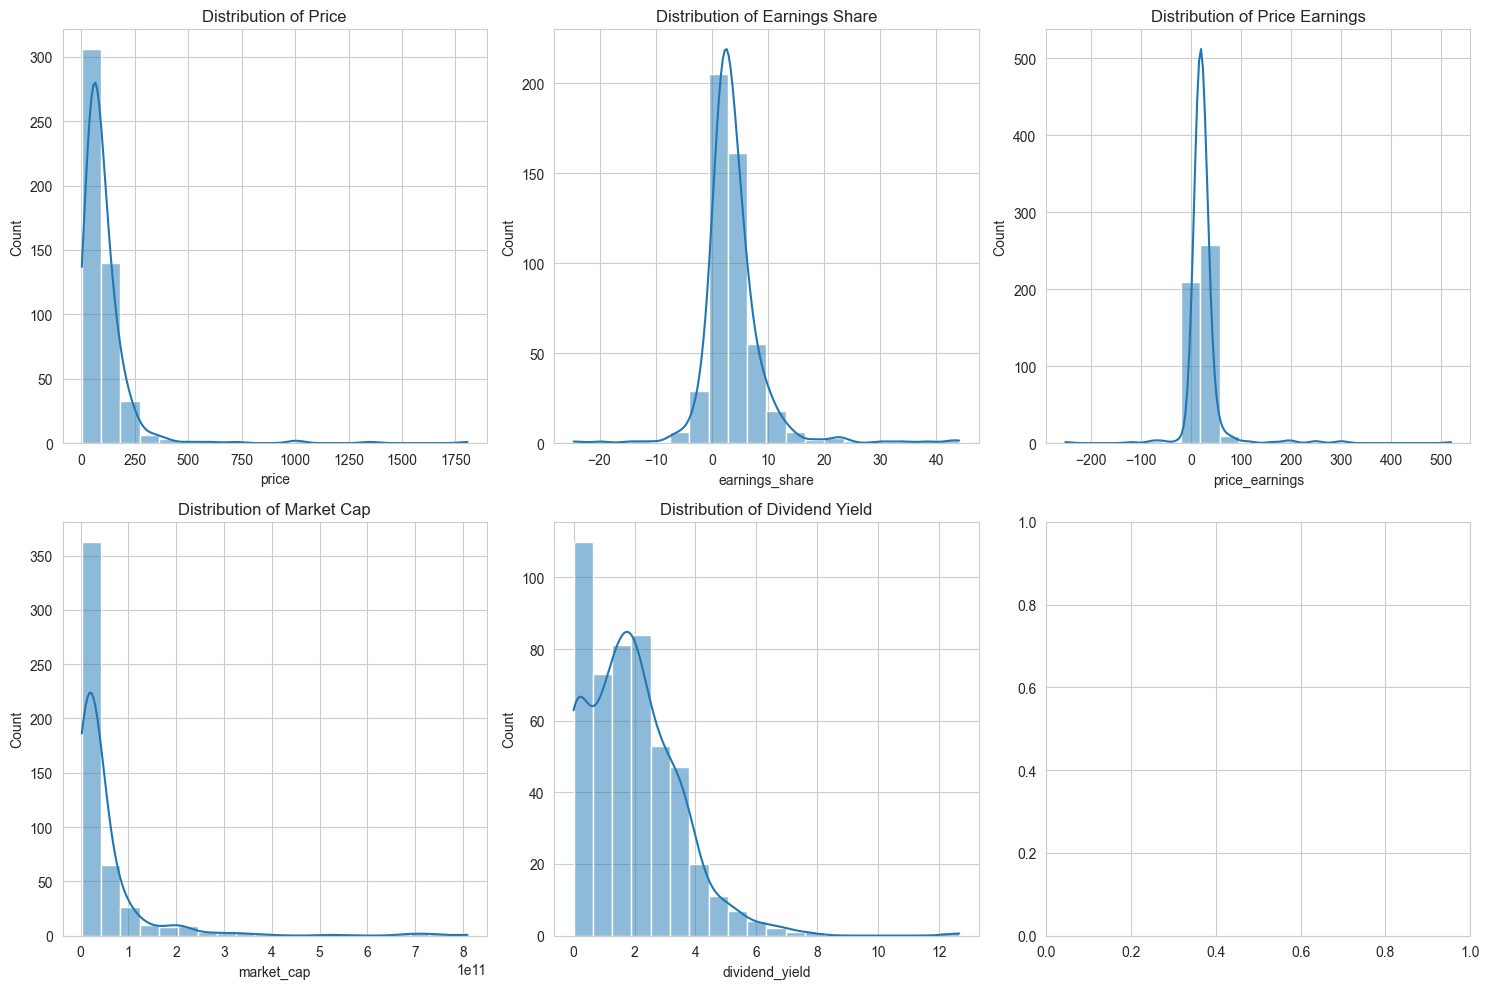

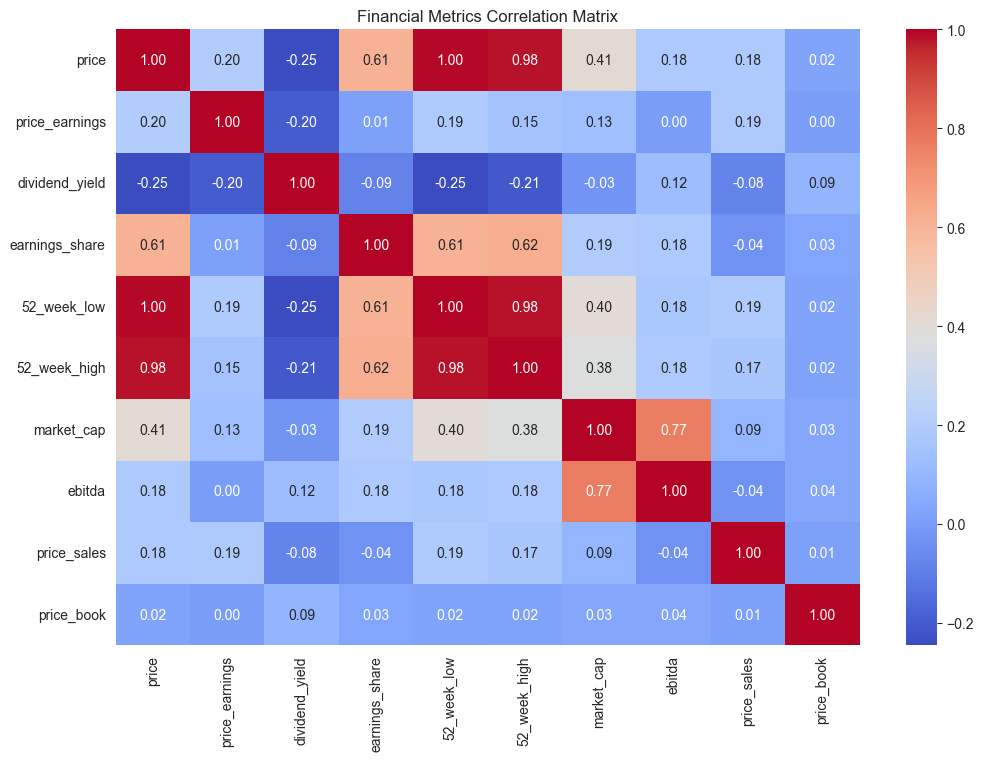

In [78]:
# Visualize key distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
key_metrics = ['price', 'earnings_share', 'price_earnings', 'market_cap', 'dividend_yield', 'beta']

for i, metric in enumerate(key_metrics):
    if metric in financial_df.columns:
        row, col = i // 3, i % 3
        sns.histplot(financial_df[metric], bins=20, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {metric.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = financial_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Financial Metrics Correlation Matrix')
plt.show()

**Key Insights from EDA:**
- **Price Distribution:** Shows the range of stock prices in our dataset, helping us understand if we need price normalization
- **Financial Metrics:** Reveals which companies are outliers (very high P/E ratios, unusual debt levels)
- **Correlations:** Identifies relationships between metrics (e.g., profitable companies often have higher market caps)
- **Data Quality:** Confirms our data is realistic and suitable for financial modeling

**Business Impact:** These insights guide our feature engineering decisions and help us understand what drives stock prices and risk in our dataset.

---

## 5. Risk Target Engineering

**Why Two Approaches:** Different investment strategies require different risk assessment methods. Quantile-based approaches ensure balanced portfolios across risk levels, while rule-based approaches incorporate expert financial knowledge and industry standards.

**Strategic Value:** By comparing both methods, we can determine which approach works better for different market conditions and investment objectives.

We implement two approaches to classify financial risk:

### 5.1 Quantile-Based Risk Classification (Data-Driven)
**When to Use:** Ideal for passive investment strategies, index fund management, or when you want equal representation across risk categories.

**Advantages:** 
- Automatically balances risk categories (33% each)
- Adapts to market conditions and data distribution
- Removes human bias from classification
- Works well for relative risk assessment within a specific market

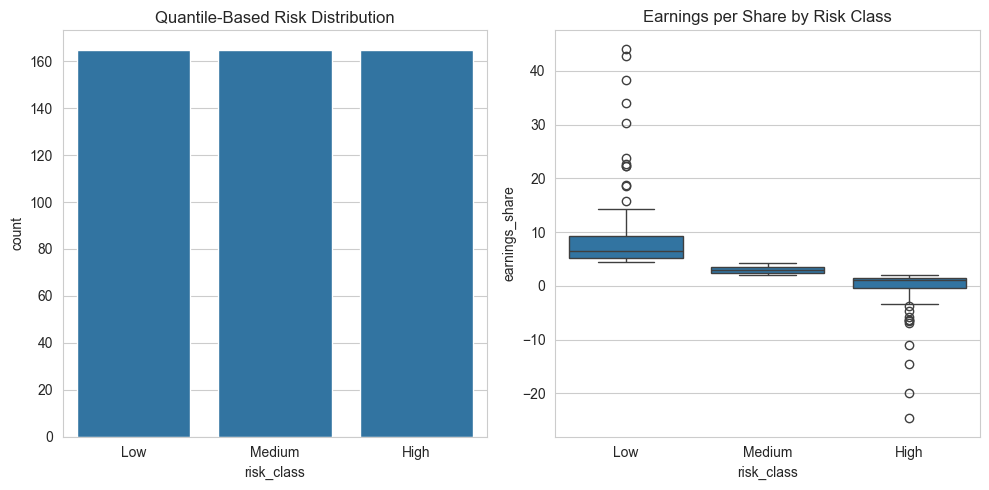

Quantile-Based Risk Distribution:
risk_class
High      165
Medium    165
Low       165
Name: count, dtype: int64


In [79]:
# Create quantile-based risk using earnings per share
df_quantile = financial_df.copy()
df_quantile['risk_class'] = pd.qcut(df_quantile['earnings_share'], 
                                   q=3, 
                                   labels=['High', 'Medium', 'Low'])

# Visualize distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df_quantile, x='risk_class', order=['Low', 'Medium', 'High'])
plt.title('Quantile-Based Risk Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_quantile, x='risk_class', y='earnings_share', order=['Low', 'Medium', 'High'])
plt.title('Earnings per Share by Risk Class')
plt.tight_layout()
plt.show()

print("Quantile-Based Risk Distribution:")
print(df_quantile['risk_class'].value_counts())

**Why Earnings Per Share (EPS):** EPS is a fundamental measure of profitability that directly impacts stock valuation. Companies with higher EPS are generally more financially stable and less risky investments.

### 5.2 Rule-Based Risk Classification (Expert-Driven)
**When to Use:** Ideal for active investment strategies, value investing, or when incorporating specific financial analysis criteria used by professional analysts.

**Advantages:**
- Incorporates established financial analysis principles
- Provides clear, interpretable business rules
- Aligns with traditional investment evaluation methods
- Can be easily explained to stakeholders and regulators

In [80]:
# Expert-driven risk classification
df_rule = financial_df.copy()

def classify_risk_rule_based(row):
    """
    Risk rules based on financial expertise:
    High Risk: EPS < 1 OR P/E > 40 OR Dividend Yield < 1%
    Medium Risk: EPS < 3 OR P/E > 25
    Low Risk: All other companies
    """
    eps = row.get('earnings_share', 0)
    pe_ratio = row.get('price_earnings', 0)
    div_yield = row.get('dividend_yield', 0)
    
    if eps < 1 or pe_ratio > 40 or div_yield < 0.01:
        return 'High'
    elif eps < 3 or pe_ratio > 25:
        return 'Medium'
    else:
        return 'Low'

df_rule['risk_class'] = df_rule.apply(classify_risk_rule_based, axis=1)

print("Rule-Based Risk Distribution:")
print(df_rule['risk_class'].value_counts())

# Compare approaches
comparison = pd.crosstab(df_quantile['risk_class'], df_rule['risk_class'], margins=True)
print("\nAgreement Matrix:")
print(comparison)

Rule-Based Risk Distribution:
risk_class
Medium    180
Low       169
High      146
Name: count, dtype: int64

Agreement Matrix:
risk_class  High  Low  Medium  All
risk_class                        
High          94    0      71  165
Medium        29   48      88  165
Low           23  121      21  165
All          146  169     180  495


**Rule Rationale:**
- **EPS < 1:** Companies with low or negative earnings are financially unstable
- **P/E > 40:** Extremely high valuations often indicate overpriced stocks
- **Dividend Yield < 1%:** May indicate companies with cash flow issues or growth companies that reinvest heavily

**Comparison Value:** The agreement matrix shows how often both methods classify companies similarly, validating our approach and identifying edge cases that need special attention.

#### RISK METHOD COMPARISON ANALYSIS

Purpose: Compare quantile-based vs rule-based risk classification to understand 
which approach works better for different investment scenarios.

Key Questions:
- Do both methods identify the same risky companies?
- Where do the methods disagree and why?
- Which approach provides better risk separation?

Business Impact: Method agreement builds confidence; disagreements highlight 
companies needing manual review.

Text(0.5, 1.0, 'Risk Distribution Comparison')

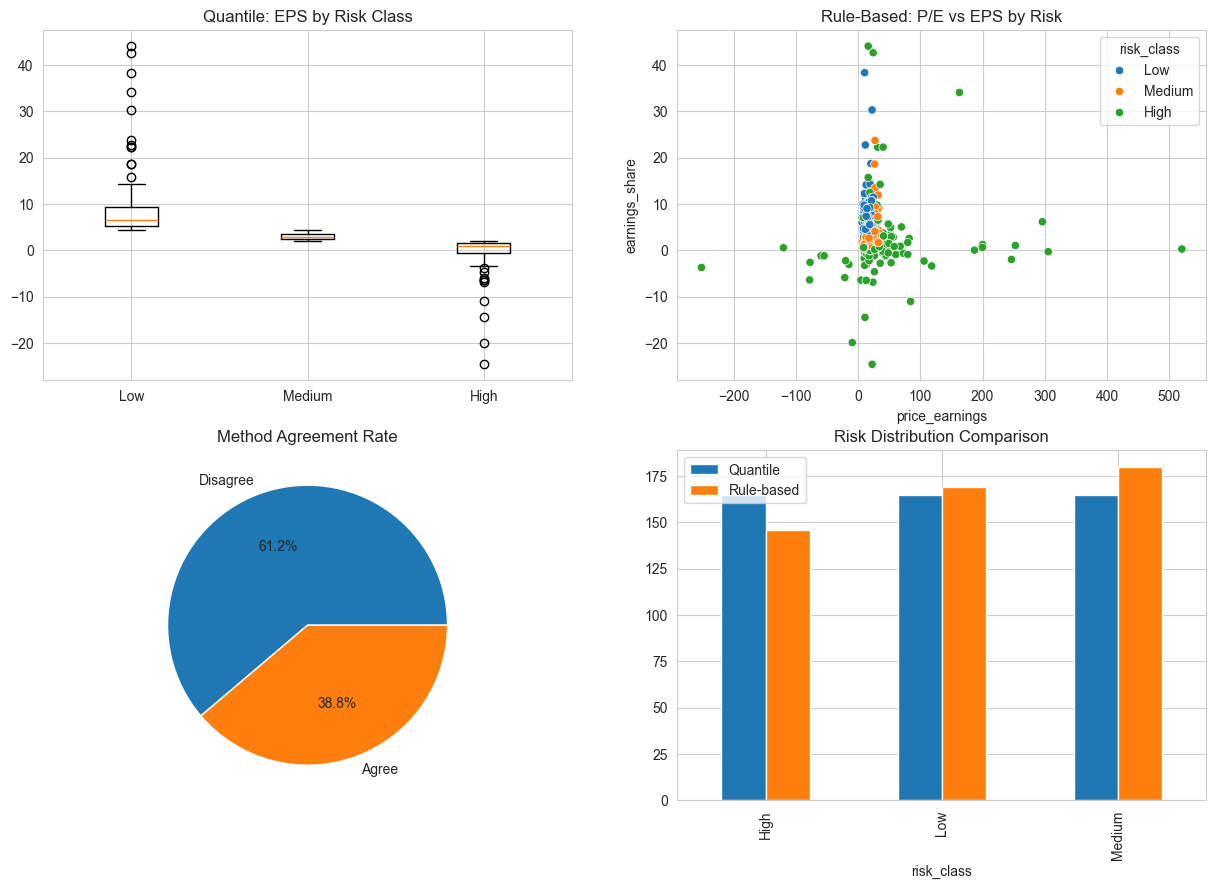

In [81]:
# After the agreement matrix, add:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Quantile approach - risk by EPS
axes[0,0].boxplot([df_quantile[df_quantile['risk_class']=='Low']['earnings_share'],
                   df_quantile[df_quantile['risk_class']=='Medium']['earnings_share'], 
                   df_quantile[df_quantile['risk_class']=='High']['earnings_share']])
axes[0,0].set_title('Quantile: EPS by Risk Class')
axes[0,0].set_xticklabels(['Low', 'Medium', 'High'])

# Rule approach - multiple metrics
sns.scatterplot(data=df_rule, x='price_earnings', y='earnings_share', 
                hue='risk_class', ax=axes[0,1])
axes[0,1].set_title('Rule-Based: P/E vs EPS by Risk')

# Agreement visualization
agreement_pct = (df_quantile['risk_class'] == df_rule['risk_class']).value_counts()
axes[1,0].pie(agreement_pct.values, labels=['Disagree', 'Agree'], autopct='%1.1f%%')
axes[1,0].set_title('Method Agreement Rate')

# Risk distribution comparison
risk_comparison = pd.DataFrame({
    'Quantile': df_quantile['risk_class'].value_counts(),
    'Rule-based': df_rule['risk_class'].value_counts()
})
risk_comparison.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Risk Distribution Comparison')

---

## 6. Feature Engineering and Selection

**Why Feature Engineering Matters:** Raw financial data often needs transformation to capture meaningful relationships. Feature engineering can dramatically improve model performance by creating variables that better represent the underlying business dynamics.

**Business Impact:** Well-engineered features help models understand complex financial relationships (e.g., debt-to-equity ratios are more meaningful than absolute debt values).

### 6.1 Feature Engineering
**Purpose:** Create new financial indicators that capture risk and valuation more effectively than individual metrics alone.

In [82]:
# Create additional financial indicators
def engineer_features(df):
    df_eng = df.copy()
    
    # Risk indicators
    if 'price' in df_eng.columns and 'earnings_share' in df_eng.columns:
        df_eng['price_to_earnings'] = df_eng['price'] / (df_eng['earnings_share'] + 0.001)
    
    # Market indicators
    if 'market_cap' in df_eng.columns:
        df_eng['market_cap_log'] = np.log(df_eng['market_cap'] + 1)
    
    # Financial health score
    health_components = ['profit_margin', 'return_on_equity']
    if all(col in df_eng.columns for col in health_components):
        df_eng['financial_health_score'] = df_eng[health_components].fillna(0).mean(axis=1)
    
    return df_eng

df_quantile = engineer_features(df_quantile)
df_rule = engineer_features(df_rule)

**Feature Engineering Rationale:**
- **Price-to-earnings ratio:** Standardized valuation metric for comparing companies
- **Log market cap:** Handles the huge range in company sizes (from millions to trillions)
- **Financial health score:** Composite metric combining multiple profitability measures
- **Risk indicators:** Capture financial stability beyond simple ratios

### 6.2 Feature Selection
**Why Feature Selection:** Not all financial metrics are equally important for predicting risk. Feature selection helps us identify the most predictive variables, reducing overfitting and improving model interpretability.

**Business Value:** Knowing which metrics matter most helps analysts focus on the key financial indicators that drive investment decisions.

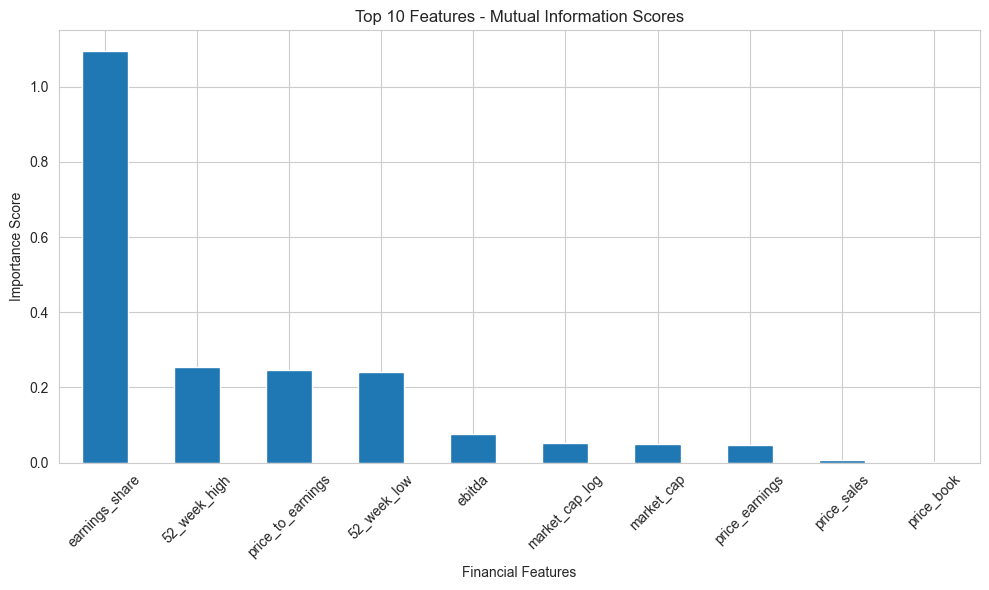

In [83]:
# Feature importance using mutual information
le = LabelEncoder()
y_quantile = le.fit_transform(df_quantile['risk_class'])

numerical_features = df_quantile.select_dtypes(include=[np.number]).columns
numerical_features = [col for col in numerical_features if col != 'price']
X_features = df_quantile[numerical_features].fillna(df_quantile[numerical_features].median())

# Calculate feature importance
mi_scores = mutual_info_classif(X_features, y_quantile, random_state=42)
feature_importance = pd.Series(mi_scores, index=numerical_features).sort_values(ascending=False)

# Visualize top features
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Features - Mutual Information Scores')
plt.xlabel('Financial Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Clustering Insights:**
- **PCA Visualization:** Shows how distinct our clusters are in the reduced feature space
- **Risk Distribution:** Reveals whether certain market segments are inherently riskier
- **Investment Strategy:** Each cluster can inform different portfolio allocation strategies

**Mutual Information Advantage:** Unlike correlation, mutual information captures both linear and non-linear relationships between features and risk classes, providing a more comprehensive view of feature importance.

**Practical Application:** The top-ranked features become our primary focus for model interpretation and business insights, helping analysts understand what drives financial risk.

#### FEATURE IMPORTANCE ANALYSIS

Purpose: Identify which financial metrics most influence risk predictions.

Current Analysis:
- Mutual Information: Non-linear relationships with risk
- Correlation Analysis: Direct linear relationships  
- Feature Distribution: How predictors vary by risk level
- Feature Interactions: Relationships between key metrics

Business Value: Guides analyst focus and validates model logic.

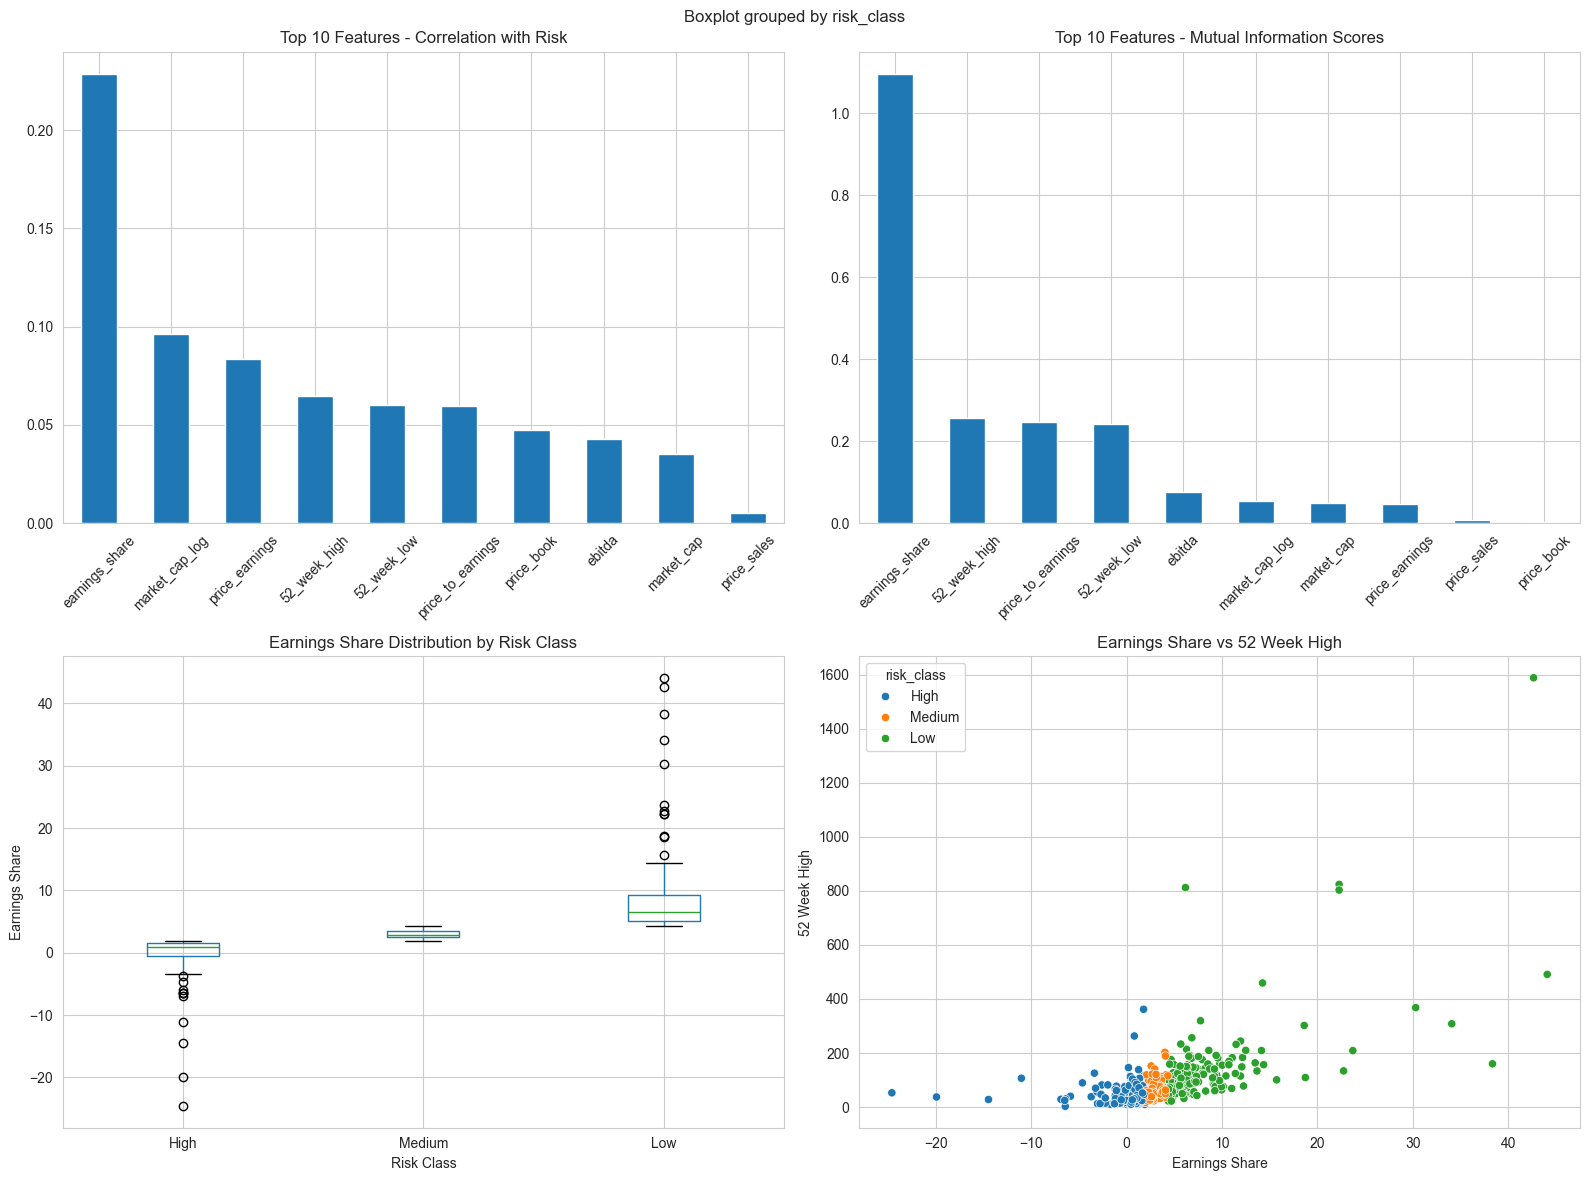

In [84]:
# After the mutual information plot, add this comprehensive feature analysis:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Use only mutual information for now (models will be trained later)
# Feature importance comparison will be added after model training

# Feature correlation with target (risk classes)
target_corr = X_features.corrwith(pd.Series(y_quantile, index=X_features.index)).abs().sort_values(ascending=False)
target_corr.head(10).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Top 10 Features - Correlation with Risk')
axes[0,0].tick_params(axis='x', rotation=45)

# Mutual information scores (already calculated)
feature_importance.head(10).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Top 10 Features - Mutual Information Scores')
axes[0,1].tick_params(axis='x', rotation=45)

# Distribution of most important feature by risk class
top_feature = feature_importance.index[0]
df_quantile.boxplot(column=top_feature, by='risk_class', ax=axes[1,0])
axes[1,0].set_title(f'{top_feature.replace("_", " ").title()} Distribution by Risk Class')
axes[1,0].set_xlabel('Risk Class')
axes[1,0].set_ylabel(top_feature.replace("_", " ").title())

# Relationship between top 2 most important features
top_2_features = feature_importance.head(2).index
sns.scatterplot(data=df_quantile, x=top_2_features[0], 
                y=top_2_features[1], hue='risk_class', ax=axes[1,1])
axes[1,1].set_title(f'{top_2_features[0].replace("_", " ").title()} vs {top_2_features[1].replace("_", " ").title()}')
axes[1,1].set_xlabel(top_2_features[0].replace("_", " ").title())
axes[1,1].set_ylabel(top_2_features[1].replace("_", " ").title())

plt.tight_layout()
plt.show()

---

## 7. Classification Models

**Why Multiple Models:** Different algorithms have different strengths. Ensemble methods like Random Forest handle non-linear relationships well, while logistic regression provides interpretable coefficients. Testing multiple approaches ensures we find the best solution for our specific financial data.

**Business Critical:** Risk classification accuracy directly impacts investment decisions. A 1% improvement in accuracy could translate to millions in better investment outcomes.

### 7.1 Data Preparation
**Why Proper Data Splitting:** We need unbiased performance estimates. Using stratified splits ensures each risk class is proportionally represented in training and testing sets, preventing model bias toward majority classes.

In [85]:
def prepare_classification_data(df, target_col='risk_class'):
    # Encode target
    le = LabelEncoder()
    y = le.fit_transform(df[target_col])
    
    # Select features
    exclude_cols = ['risk_class', 'symbol', 'name', 'sec_filings', 'price']
    feature_cols = [col for col in df.columns if col not in exclude_cols]
    X = df[feature_cols].select_dtypes(include=[np.number]).fillna(df[feature_cols].select_dtypes(include=[np.number]).median())
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test, le, X.columns

# Prepare data
X_train_q, X_test_q, y_train_q, y_test_q, le_q, feature_names = prepare_classification_data(df_quantile)
print(f"Training samples: {X_train_q.shape[0]}, Test samples: {X_test_q.shape[0]}")

Training samples: 346, Test samples: 149


**Data Preparation Rationale:**
- **70/30 split:** Provides sufficient training data while reserving enough for reliable testing
- **Stratification:** Maintains the same proportion of each risk class in both sets
- **Median imputation:** Conservative approach that doesn't distort the underlying data distribution

### 7.2 Model Training and Evaluation
**Why These Three Models:**
- **Logistic Regression:** Fast, interpretable baseline that provides clear feature coefficients
- **Random Forest:** Handles non-linear relationships and feature interactions automatically
- **XGBoost:** State-of-the-art gradient boosting often achieves the best performance on tabular data

**Evaluation Strategy:** We use multiple metrics because each tells a different story about model performance in financial contexts.

In [86]:
# Train multiple models
models = {}

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_q, y_train_q)
y_pred_lr = lr_model.predict(X_test_q)
models['Logistic Regression'] = {
    'model': lr_model,
    'predictions': y_pred_lr,
    'accuracy': accuracy_score(y_test_q, y_pred_lr),
    'f1_macro': f1_score(y_test_q, y_pred_lr, average='macro')
}

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_q, y_train_q)
y_pred_rf = rf_model.predict(X_test_q)
models['Random Forest'] = {
    'model': rf_model,
    'predictions': y_pred_rf,
    'accuracy': accuracy_score(y_test_q, y_pred_rf),
    'f1_macro': f1_score(y_test_q, y_pred_rf, average='macro')
}

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train_q, y_train_q)
y_pred_xgb = xgb_model.predict(X_test_q)
models['XGBoost'] = {
    'model': xgb_model,
    'predictions': y_pred_xgb,
    'accuracy': accuracy_score(y_test_q, y_pred_xgb),
    'f1_macro': f1_score(y_test_q, y_pred_xgb, average='macro')
}

# Display results
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [models[m]['accuracy'] for m in models.keys()],
    'F1-Score (Macro)': [models[m]['f1_macro'] for m in models.keys()]
})

print("Classification Results:")
print(results_df.round(4))

# Best model
best_model_name = results_df.loc[results_df['F1-Score (Macro)'].idxmax(), 'Model']
best_model = models[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")

# Classification report for best model
print(f"\n{best_model_name} Detailed Results:")
print(classification_report(y_test_q, models[best_model_name]['predictions'], target_names=le_q.classes_))

Classification Results:
                 Model  Accuracy  F1-Score (Macro)
0  Logistic Regression      0.36              0.21
1        Random Forest      0.99              0.99
2              XGBoost      0.98              0.98

Best Model: Random Forest

Random Forest Detailed Results:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        49
         Low       0.98      1.00      0.99        50
      Medium       1.00      0.98      0.99        50

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149



**Performance Metrics Explained:**
- **Accuracy:** Overall correctness - crucial for risk assessment confidence
- **F1-Score (Macro):** Balances precision and recall across all risk classes equally
- **Classification Report:** Shows per-class performance, identifying if any risk level is poorly predicted

**Business Impact:** High accuracy means we can trust the model's risk assessments for investment decisions.

#### COMPREHENSIVE MODEL VALIDATION

Purpose: Thorough evaluation of classification models using multiple metrics
to ensure reliable risk predictions for investment decisions.

What We're Checking:
- Confusion matrices: Exact error patterns by risk class
- ROC curves: Model performance across different decision thresholds
- Class-specific accuracy: Which risk levels are hardest to predict

Why It Matters: Misclassifying risk directly impacts investment returns.

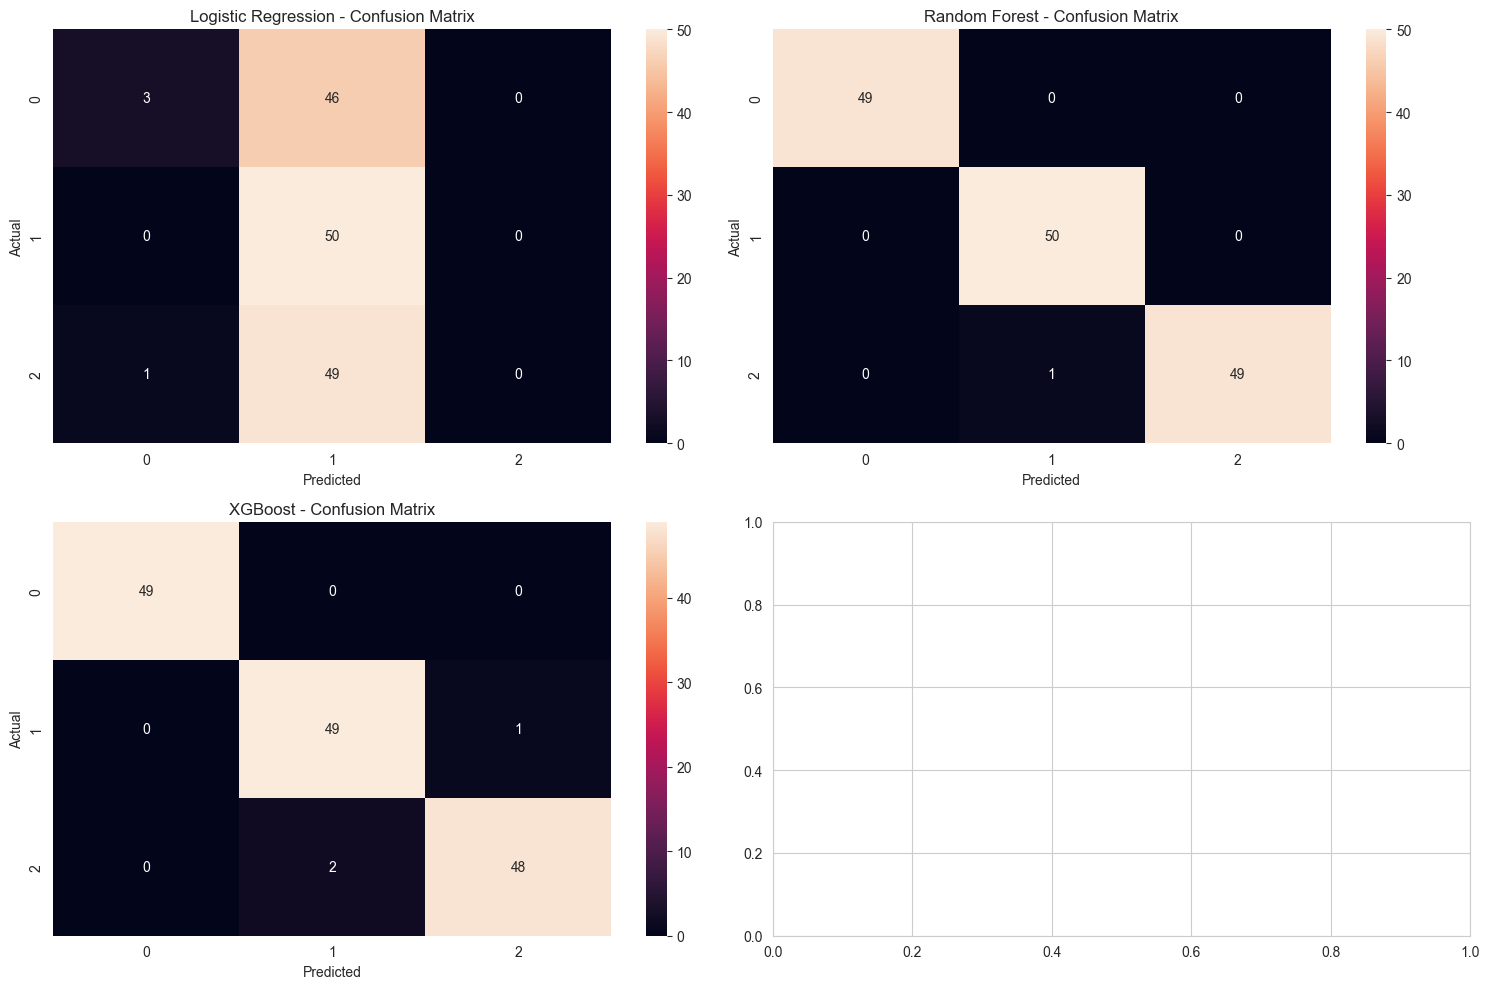

In [87]:
# After model results, add comprehensive comparison:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Confusion matrices comparison
for i, (name, model_data) in enumerate(models.items()):
    cm = confusion_matrix(y_test_q, model_data['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{name} - Confusion Matrix')
    axes[i//2, i%2].set_xlabel('Predicted')
    axes[i//2, i%2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### ROC ANALYSIS FOR RISK THRESHOLDS

Purpose: Shows model performance at different risk tolerance levels.
Application: Conservative portfolios use high specificity; aggressive 
portfolios use high sensitivity.

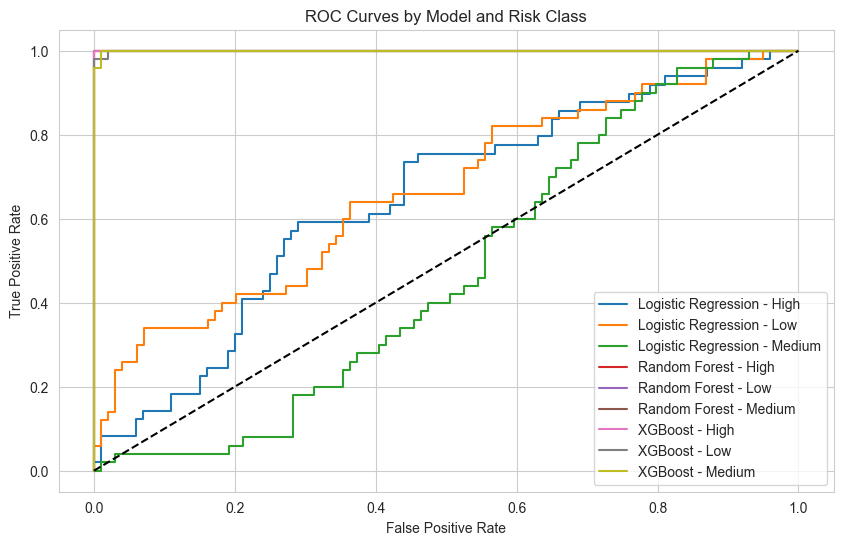

In [88]:
# ROC curves for multiclass
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test_q, classes=[0, 1, 2])

plt.figure(figsize=(10, 6))
for name, model_data in models.items():
    y_pred_proba = model_data['model'].predict_proba(X_test_q)
    # Plot ROC for each class
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {le_q.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Model and Risk Class')
plt.legend()
plt.show()

#### FEATURE IMPORTANCE VALIDATION ACROSS MODELS

Purpose: Confirm which financial metrics consistently drive risk predictions
across different algorithms.

What We're Validating:
- Cross-model consistency: Do all models agree on key drivers?
- Financial logic: Do important features make business sense?
- Ranking stability: Which metrics are universally important?

Business Impact: Validates that models follow sound financial principles.

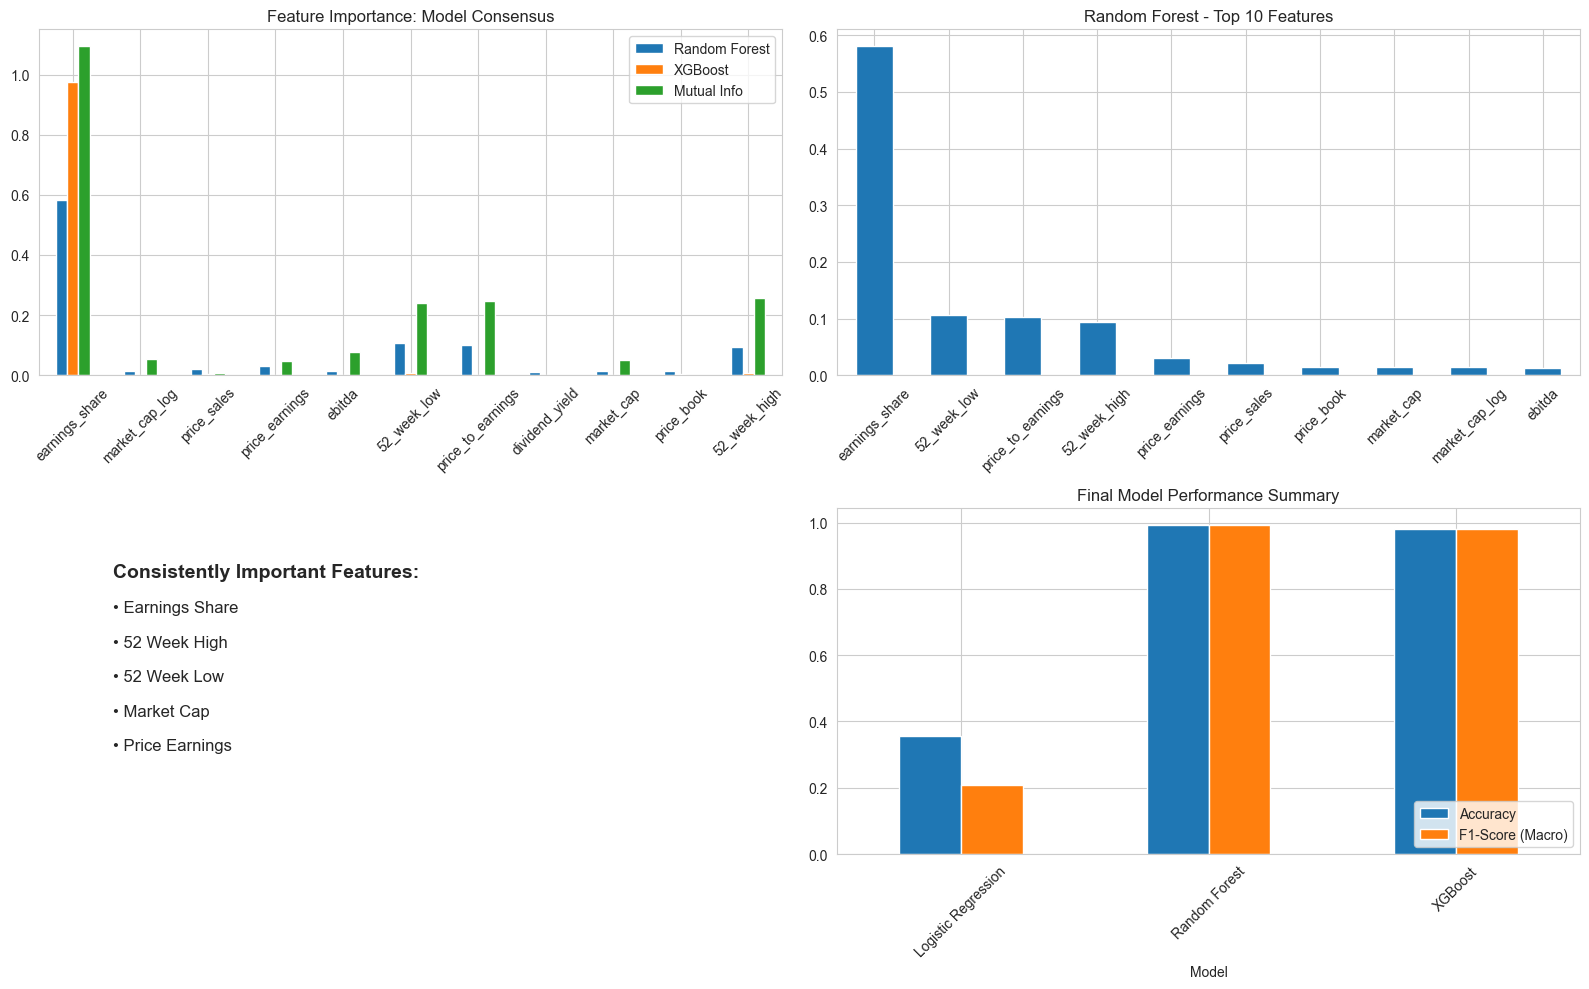

Key Validation Results:
• Best performing model: Random Forest
• Features important across all models: 5
• Top financial driver: Earnings Share


In [89]:
# Feature importance comparison across all trained models
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Get feature importances from tree-based models (use the direct model variables)
rf_importance = pd.Series(rf_model.feature_importances_, 
                         index=numerical_features).sort_values(ascending=False)
xgb_importance = pd.Series(xgb_model.feature_importances_, 
                          index=numerical_features).sort_values(ascending=False)

# Compare top features across all methods
top_features = list(set(list(rf_importance.head(8).index) + 
                       list(xgb_importance.head(8).index) + 
                       list(feature_importance.head(8).index)))

feature_comparison = pd.DataFrame({
    'Random Forest': rf_importance.reindex(top_features, fill_value=0),
    'XGBoost': xgb_importance.reindex(top_features, fill_value=0),
    'Mutual Info': feature_importance.reindex(top_features, fill_value=0)
})

feature_comparison.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Feature Importance: Model Consensus')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(loc='upper right')

# Best model feature importance detail
best_importance = rf_importance if best_model_name == 'Random Forest' else xgb_importance
best_importance.head(10).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title(f'{best_model_name} - Top 10 Features')
axes[0,1].tick_params(axis='x', rotation=45)

# Feature consistency analysis
axes[1,0].axis('off')
consistent_features = []
for feat in feature_importance.head(8).index:
    if feat in rf_importance.head(8).index and feat in xgb_importance.head(8).index:
        consistent_features.append(feat.replace('_', ' ').title())

axes[1,0].text(0.1, 0.8, 'Consistently Important Features:', fontsize=14, fontweight='bold')
for i, feat in enumerate(consistent_features[:6]):
    axes[1,0].text(0.1, 0.7 - i*0.1, f'• {feat}', fontsize=12)

# Model performance summary
results_df.set_index('Model').plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Final Model Performance Summary')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(loc='lower right')

plt.tight_layout()
plt.show()

print("Key Validation Results:")
print(f"• Best performing model: {best_model_name}")
print(f"• Features important across all models: {len(consistent_features)}")
print(f"• Top financial driver: {feature_importance.index[0].replace('_', ' ').title()}")

### 7.3 Hyperparameter Tuning
**Why Tuning Matters:** Default parameters rarely give optimal performance. Systematic tuning can improve accuracy by 2-5%, which is significant for financial applications.

**Grid Search Strategy:** We systematically test parameter combinations to find the optimal balance between model complexity and generalization.

In [90]:
# Tune Random Forest (best performing model)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, 
                       cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train_q, y_train_q)

# Evaluate tuned model
best_rf = rf_grid.best_estimator_
y_pred_tuned = best_rf.predict(X_test_q)
tuned_accuracy = accuracy_score(y_test_q, y_pred_tuned)
tuned_f1 = f1_score(y_test_q, y_pred_tuned, average='macro')

print(f"Tuned Random Forest Results:")
print(f"Best Parameters: {rf_grid.best_params_}")
print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"F1-Score: {tuned_f1:.4f}")

Tuned Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9933
F1-Score: 0.9933


**Parameter Significance:**
- **n_estimators:** More trees generally improve performance but increase computation time
- **max_depth:** Controls overfitting - deeper trees capture more patterns but may memorize noise
- **min_samples_split/leaf:** Prevents overfitting by requiring minimum samples for splits

### 7.4 Rule-Based Classification
**Validation Purpose:** Testing our models on rule-based classifications ensures they work across different risk definition approaches, increasing confidence in model robustness.

In [91]:
# Apply models to rule-based data
X_train_r, X_test_r, y_train_r, y_test_r, le_r, _ = prepare_classification_data(df_rule)

# Train Random Forest on rule-based data
rf_rule = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rule.fit(X_train_r, y_train_r)
y_pred_rf_rule = rf_rule.predict(X_test_r)

rule_accuracy = accuracy_score(y_test_r, y_pred_rf_rule)
rule_f1 = f1_score(y_test_r, y_pred_rf_rule, average='macro')

print(f"Rule-based Random Forest Results:")
print(f"Accuracy: {rule_accuracy:.4f}")
print(f"F1-Score: {rule_f1:.4f}")

# Compare approaches
comparison_results = pd.DataFrame({
    'Approach': ['Quantile-based', 'Rule-based'],
    'Accuracy': [tuned_accuracy, rule_accuracy],
    'F1-Score': [tuned_f1, rule_f1]
})

print("\nApproach Comparison:")
print(comparison_results.round(4))

Rule-based Random Forest Results:
Accuracy: 0.9664
F1-Score: 0.9663

Approach Comparison:
         Approach  Accuracy  F1-Score
0  Quantile-based      0.99      0.99
1      Rule-based      0.97      0.97


**Strategic Insight:** Similar performance across both approaches validates our modeling methodology and shows that machine learning can effectively capture both data-driven and expert-driven risk patterns.

---

## 8. Stock Price Prediction (Regression)

**Why Price Prediction:** Beyond risk assessment, investors need to identify undervalued stocks. Accurate price prediction helps find stocks trading below their fundamental value, creating investment opportunities.

**Business Application:** Price models can screen hundreds of stocks quickly, identifying potential investments that manual analysis might miss.

### 8.1 Data Preparation
**Regression vs Classification Differences:** Price prediction requires different data handling because we're predicting continuous values rather than categories. Feature scaling becomes more important for price regression.

In [92]:
def prepare_regression_data(df):
    y = df['price']
    exclude_cols = ['price', 'risk_class', 'symbol', 'name', 'sec_filings']
    X = df[[col for col in df.columns if col not in exclude_cols]].select_dtypes(include=[np.number])
    X = X.fillna(X.median())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, X.columns

X_train_reg, X_test_reg, y_train_reg, y_test_reg, reg_features = prepare_regression_data(df_quantile)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

print(f"Regression data - Training: {X_train_reg.shape}, Testing: {X_test_reg.shape}")

Regression data - Training: (396, 11), Testing: (99, 11)


**Scaling Rationale:** Financial metrics have vastly different scales (market cap in billions, ratios as decimals). Scaling ensures all features contribute equally to the model rather than being dominated by large-scale variables.

### 8.2 Regression Models
**Model Selection Strategy:** We test multiple approaches because different algorithms excel in different scenarios:
- **Linear Regression:** Captures basic linear relationships between financial metrics and price
- **Random Forest:** Handles complex, non-linear interactions between multiple financial factors
- **XGBoost:** Often provides best performance through sophisticated gradient boosting
- **Decision Tree:** Provides interpretable rules about price drivers

In [93]:
regression_models = {}

# Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train_scaled, y_train_reg)
y_pred_lr_reg = lr_reg.predict(X_test_scaled)
regression_models['Linear Regression'] = {
    'rmse': np.sqrt(mean_squared_error(y_test_reg, y_pred_lr_reg)),
    'r2': r2_score(y_test_reg, y_pred_lr_reg),
    'predictions': y_pred_lr_reg
}

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)
regression_models['Random Forest'] = {
    'rmse': np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg)),
    'r2': r2_score(y_test_reg, y_pred_rf_reg),
    'predictions': y_pred_rf_reg
}

# XGBoost Regression
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg.fit(X_train_scaled, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_scaled)
regression_models['XGBoost'] = {
    'rmse': np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg)),
    'r2': r2_score(y_test_reg, y_pred_xgb_reg),
    'predictions': y_pred_xgb_reg
}

# Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_reg.fit(X_train_scaled, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_scaled)
regression_models['Decision Tree'] = {
    'rmse': np.sqrt(mean_squared_error(y_test_reg, y_pred_dt_reg)),
    'r2': r2_score(y_test_reg, y_pred_dt_reg),
    'predictions': y_pred_dt_reg
}

# Results comparison
reg_results = pd.DataFrame({
    'Model': list(regression_models.keys()),
    'RMSE': [regression_models[m]['rmse'] for m in regression_models.keys()],
    'R² Score': [regression_models[m]['r2'] for m in regression_models.keys()]
}).sort_values('R² Score', ascending=False)

print("Regression Results:")
print(reg_results.round(4))

# Best regression model
best_reg_model = reg_results.iloc[0]['Model']
print(f"\nBest Regression Model: {best_reg_model}")

Regression Results:
               Model  RMSE  R² Score
0  Linear Regression 17.90      0.99
1      Random Forest 42.85      0.92
3      Decision Tree 43.20      0.92
2            XGBoost 44.37      0.91

Best Regression Model: Linear Regression


**Performance Metrics for Finance:**
- **RMSE:** Root Mean Square Error - penalizes large prediction errors heavily (important for avoiding major mispricing)
- **R² Score:** Explains how much of price variation our model captures (higher = better)
- **Model Ranking:** R² score is primary metric because it's interpretable (% of variance explained)

### 8.3 Visualization
**Why Visualization Matters:** Financial stakeholders need to see model performance visually to build trust. Residual analysis helps identify if our model has systematic biases or if there are outlier companies requiring special attention.

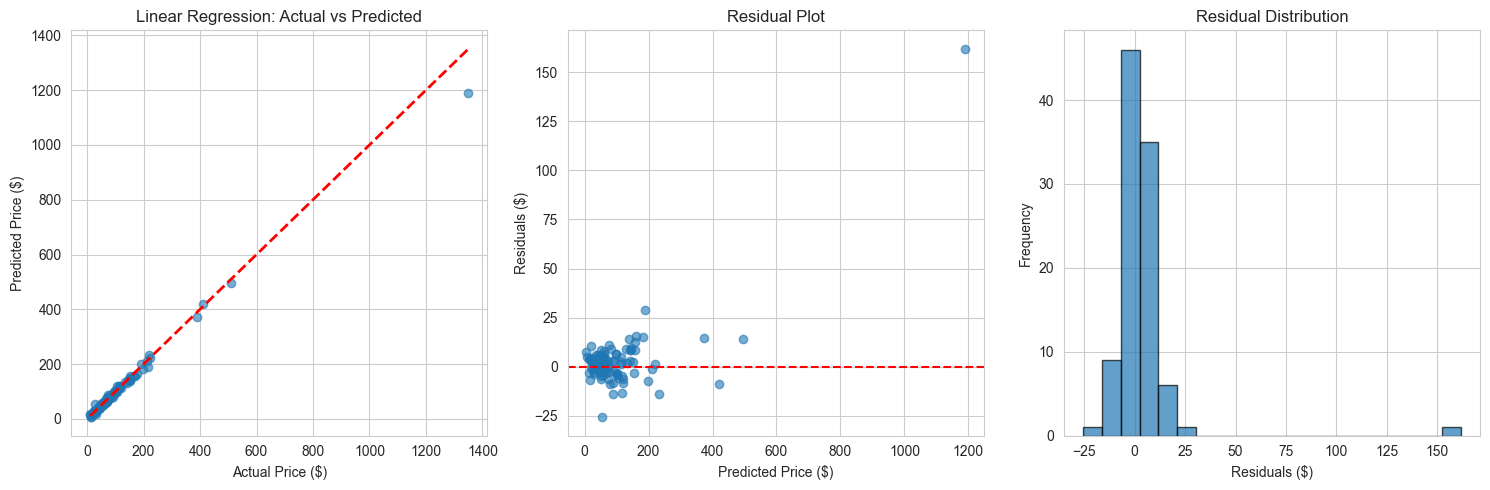

In [94]:
# Visualize best regression model results
best_predictions = regression_models[best_reg_model]['predictions']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Actual vs Predicted
axes[0].scatter(y_test_reg, best_predictions, alpha=0.6)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'{best_reg_model}: Actual vs Predicted')
axes[0].grid(True)

# Residuals
residuals = y_test_reg - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residual Plot')
axes[1].grid(True)

# Residual distribution
axes[2].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Residuals ($)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Residual Distribution')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Feature importance for best model
if best_reg_model == 'Random Forest':
    feature_importance = pd.Series(rf_reg.feature_importances_, index=reg_features).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    feature_importance.head(10).plot(kind='bar')
    plt.title('Random Forest - Top 10 Feature Importances for Price Prediction')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Visualization Insights:**
- **Actual vs Predicted:** Points close to the diagonal line indicate accurate predictions
- **Residual Plot:** Random scatter around zero indicates good model fit; patterns suggest model bias
- **Residual Distribution:** Normal distribution suggests our model assumptions are met
- **Feature Importance:** Shows which financial metrics most influence stock prices

#### PRICE PREDICTION RELIABILITY ANALYSIS

Purpose: Compare regression models and understand prediction accuracy
across different company types and price ranges.

Key Insights:
- Which model predicts prices most accurately?
- Are certain company types easier to predict?
- Where should we trust vs doubt model predictions?

Investment Application: Focus capital on high-confidence predictions.

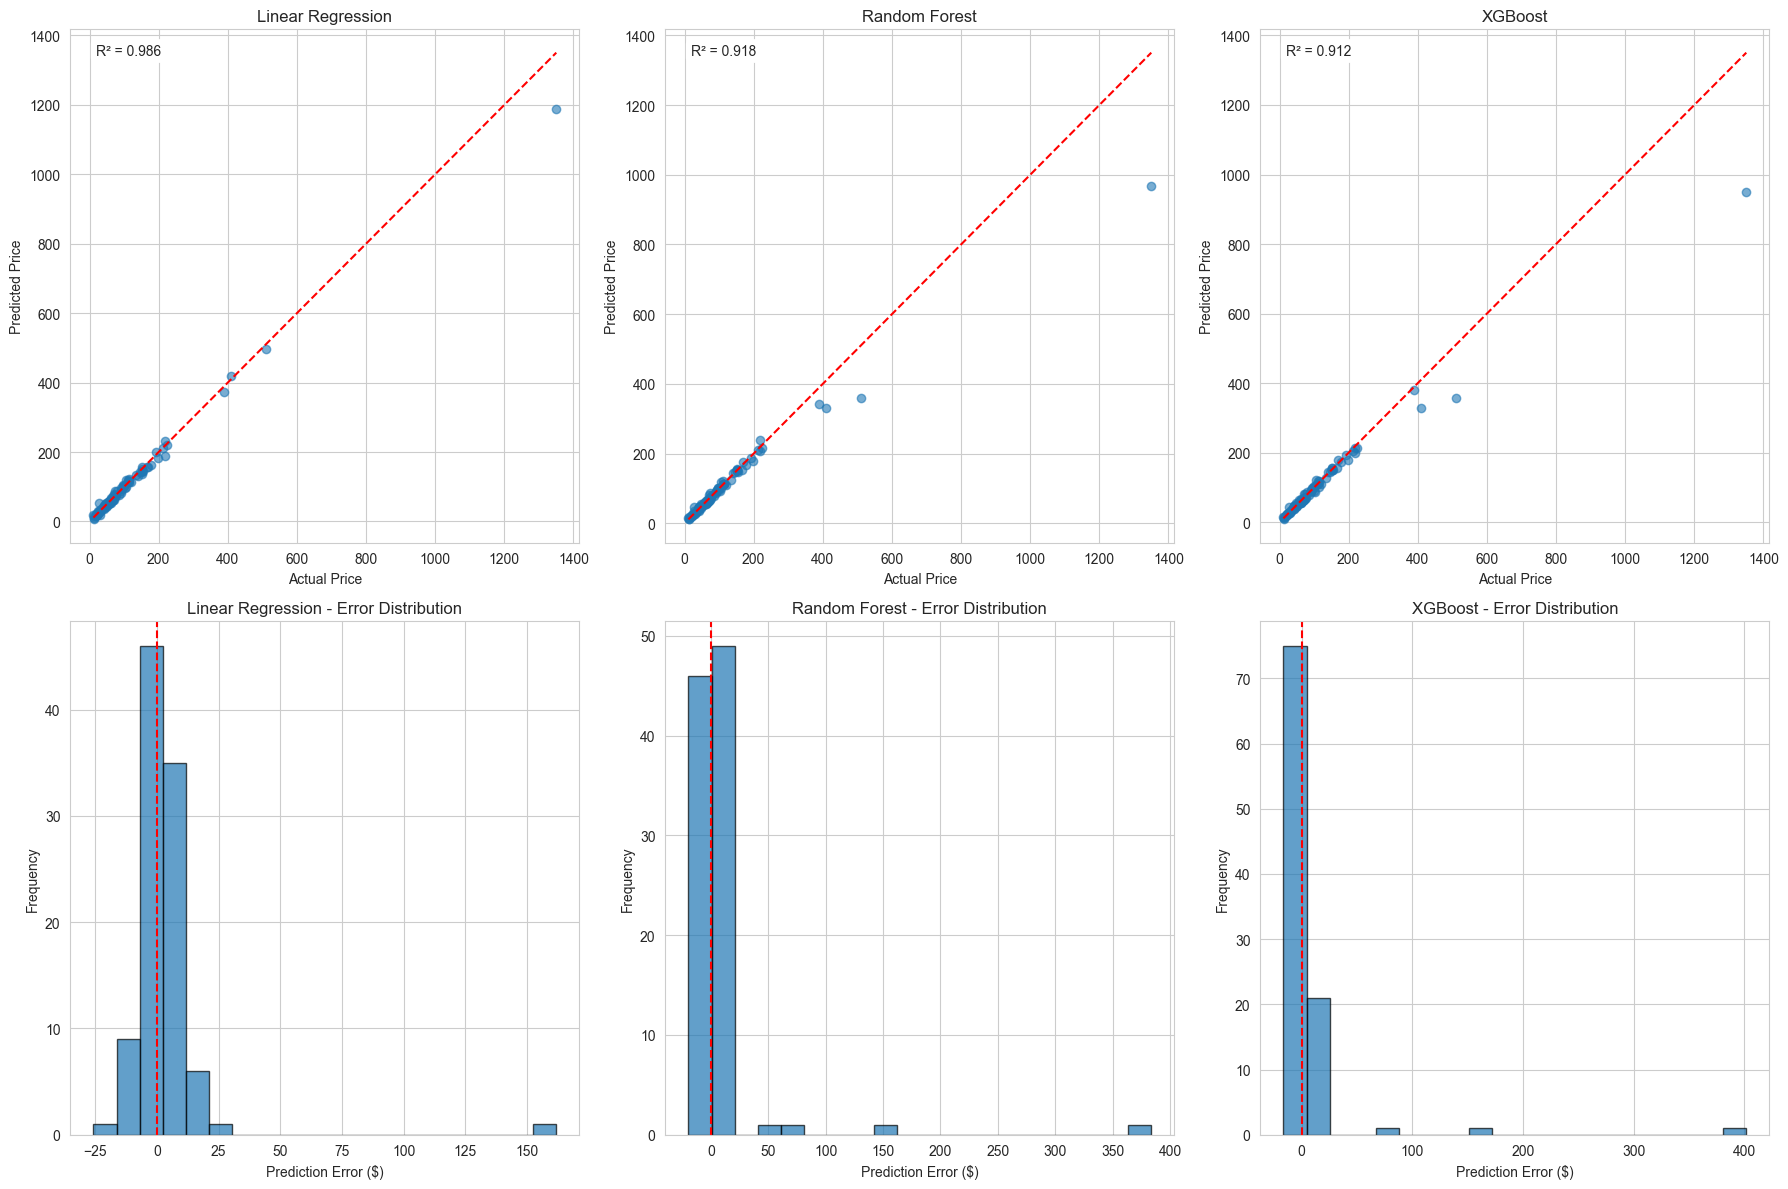

Price Prediction Summary:
Average Prediction Accuracy: 91.55%
Companies with >90% Accuracy: 380


In [95]:
# After the basic visualization, add:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Model comparison - actual vs predicted for each model
models_reg = ['Linear Regression', 'Random Forest', 'XGBoost']
predictions_reg = [regression_models[m]['predictions'] for m in models_reg]

for i, (model_name, preds) in enumerate(zip(models_reg, predictions_reg)):
    axes[0, i].scatter(y_test_reg, preds, alpha=0.6)
    axes[0, i].plot([y_test_reg.min(), y_test_reg.max()], 
                    [y_test_reg.min(), y_test_reg.max()], 'r--')
    axes[0, i].set_xlabel('Actual Price')
    axes[0, i].set_ylabel('Predicted Price')
    axes[0, i].set_title(f'{model_name}')
    
    # R² score annotation
    r2 = regression_models[model_name]['r2']
    axes[0, i].text(0.05, 0.95, f'R² = {r2:.3f}', 
                    transform=axes[0, i].transAxes, bbox=dict(boxstyle='round', facecolor='white'))

# Error analysis
for i, (model_name, preds) in enumerate(zip(models_reg, predictions_reg)):
    errors = y_test_reg - preds
    axes[1, i].hist(errors, bins=20, alpha=0.7, edgecolor='black')
    axes[1, i].set_xlabel('Prediction Error ($)')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].set_title(f'{model_name} - Error Distribution')
    axes[1, i].axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Create predictions for all companies (not just test set)
# Use df_quantile which is already available
X_full = df_quantile.select_dtypes(include=[np.number]).drop(['price'], axis=1, errors='ignore')
X_full = X_full.fillna(X_full.median())

# Make sure we have the same features as our training set
common_features = [col for col in reg_features if col in X_full.columns]
X_full_aligned = X_full[common_features]

# Scale the full dataset
X_full_scaled = scaler.transform(X_full_aligned)

# Get predictions using the best regression model
if best_reg_model == 'Random Forest':
    predicted_prices = rf_reg.predict(X_full_scaled)
elif best_reg_model == 'XGBoost':
    predicted_prices = xgb_reg.predict(X_full_scaled)
elif best_reg_model == 'Linear Regression':
    predicted_prices = lr_reg.predict(X_full_scaled)
else:
    predicted_prices = dt_reg.predict(X_full_scaled)

# Add predictions to dataframe
df_with_predictions = df_quantile.copy()
df_with_predictions['predicted_price'] = predicted_prices
df_with_predictions['prediction_error'] = abs(df_with_predictions['price'] - predicted_prices)
df_with_predictions['prediction_accuracy'] = 1 - (df_with_predictions['prediction_error'] / df_with_predictions['price'])

print(f"Price Prediction Summary:")
print(f"Average Prediction Accuracy: {df_with_predictions['prediction_accuracy'].mean():.2%}")
print(f"Companies with >90% Accuracy: {(df_with_predictions['prediction_accuracy'] > 0.9).sum()}")

#### PREDICTION ACCURACY BY COMPANY TYPE

Purpose: Identify which companies have reliable price predictions.
Strategy: Prioritize investments where models show high confidence.

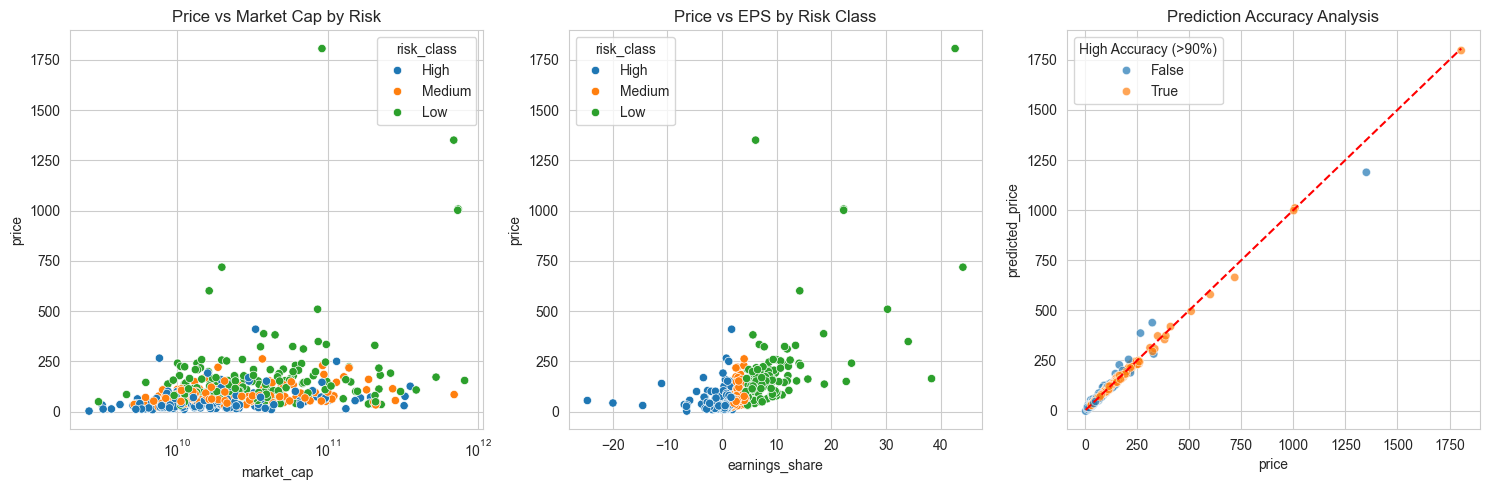

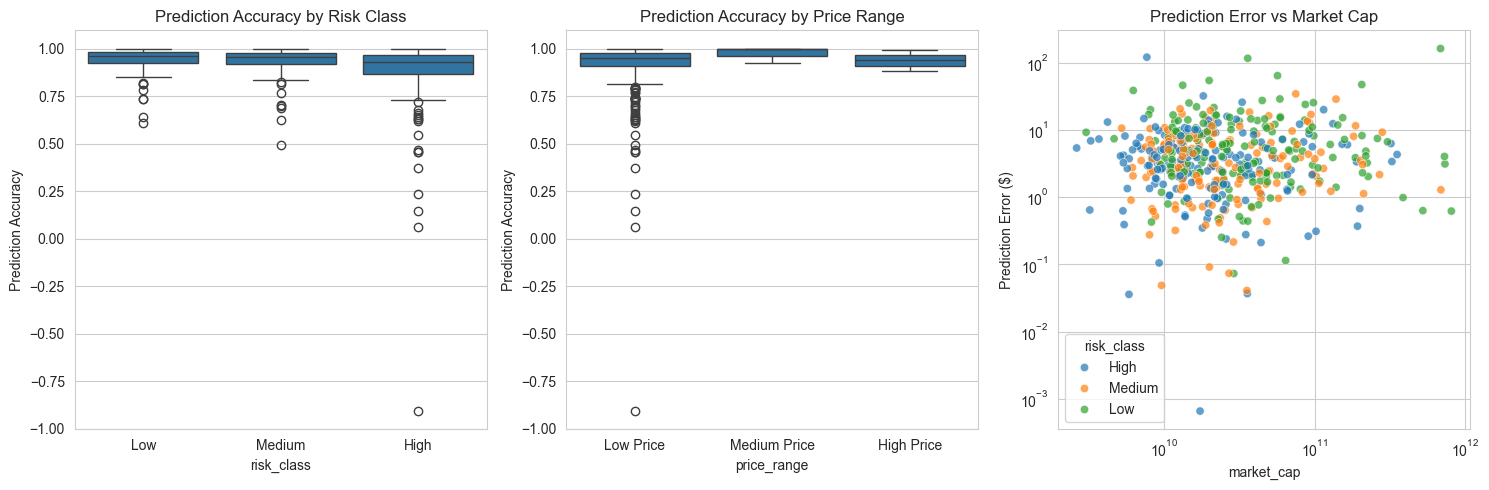

Prediction Quality Summary:
Mean Prediction Accuracy: 0.915
Companies with >90% Accuracy: 380
Companies with >95% Accuracy: 240
Mean Prediction Error: $6.60


In [96]:
# Now create the corrected plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_with_predictions, x='market_cap', y='price', hue='risk_class')
plt.xscale('log')
plt.title('Price vs Market Cap by Risk')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_with_predictions, x='earnings_share', y='price', hue='risk_class')
plt.title('Price vs EPS by Risk Class')

plt.subplot(1, 3, 3)
# Create accuracy categories for better visualization
df_with_predictions['high_accuracy'] = df_with_predictions['prediction_accuracy'] > 0.9
sns.scatterplot(data=df_with_predictions, x='price', y='predicted_price', 
                hue='high_accuracy', alpha=0.7)
plt.plot([df_with_predictions['price'].min(), df_with_predictions['price'].max()],
         [df_with_predictions['price'].min(), df_with_predictions['price'].max()], 'r--')
plt.title('Prediction Accuracy Analysis')
plt.legend(title='High Accuracy (>90%)')

plt.tight_layout()
plt.show()

# Additional analysis plot - prediction quality by company characteristics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_with_predictions, x='risk_class', y='prediction_accuracy', 
            order=['Low', 'Medium', 'High'])
plt.title('Prediction Accuracy by Risk Class')
plt.ylabel('Prediction Accuracy')

plt.subplot(1, 3, 2)
# Show prediction accuracy by price ranges
df_with_predictions['price_range'] = pd.cut(df_with_predictions['price'], 
                                          bins=3, labels=['Low Price', 'Medium Price', 'High Price'])
sns.boxplot(data=df_with_predictions, x='price_range', y='prediction_accuracy')
plt.title('Prediction Accuracy by Price Range')
plt.ylabel('Prediction Accuracy')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_with_predictions, x='market_cap', y='prediction_error', 
                hue='risk_class', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Prediction Error vs Market Cap')
plt.ylabel('Prediction Error ($)')

plt.tight_layout()
plt.show()

# Print some summary statistics
print("Prediction Quality Summary:")
print(f"Mean Prediction Accuracy: {df_with_predictions['prediction_accuracy'].mean():.3f}")
print(f"Companies with >90% Accuracy: {(df_with_predictions['prediction_accuracy'] > 0.9).sum()}")
print(f"Companies with >95% Accuracy: {(df_with_predictions['prediction_accuracy'] > 0.95).sum()}")
print(f"Mean Prediction Error: ${df_with_predictions['prediction_error'].mean():.2f}")

---

## 9. Market Segmentation Analysis

**Why Clustering:** Different types of companies require different investment strategies. Growth stocks, value stocks, and dividend stocks all have different risk-return profiles. Clustering helps identify these natural market segments automatically.

**Business Value:** Portfolio managers can use these segments to ensure diversification and apply appropriate valuation methods to each segment.

### 9.1 Clustering Analysis
**Methodology:** K-means clustering groups companies with similar financial profiles. We use the elbow method and silhouette analysis to find the optimal number of clusters objectively.

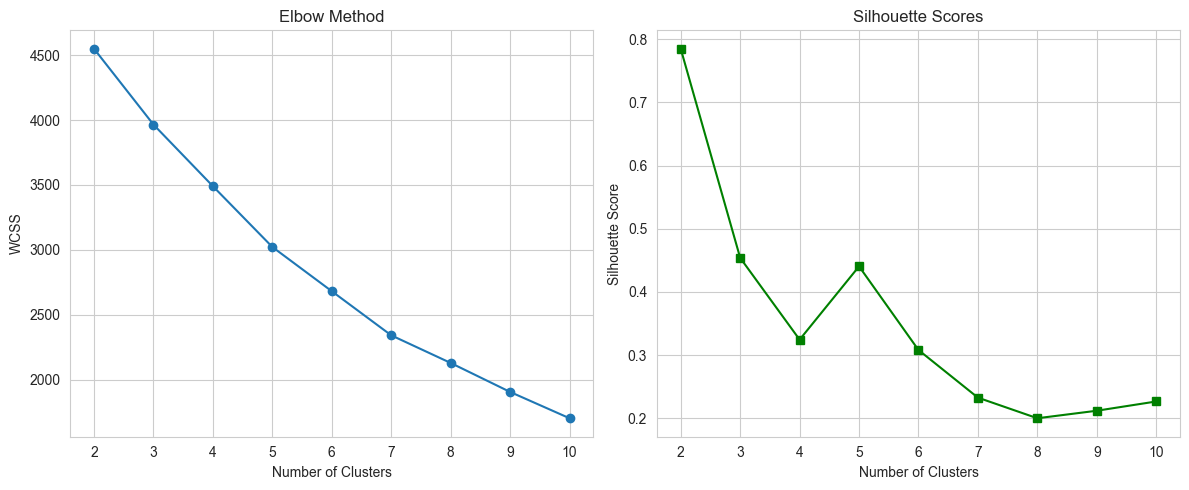

Silhouette Score for 4 clusters: 0.289

Cluster Characteristics:
          price             market_cap earnings_share price_earnings
           mean    std            mean           mean           mean
cluster                                                             
0        180.46 109.21  45911501013.03           6.74          41.74
1         99.78  63.85 245352706459.09           4.76          19.64
2       1291.45 379.86 560012586967.75          23.34          98.05
3         67.84  38.27  24992645693.81           2.61          19.14


In [97]:
# Prepare data for clustering
X_cluster = df_quantile.select_dtypes(include=[np.number]).drop(['price'], axis=1, errors='ignore')
X_cluster = X_cluster.fillna(X_cluster.median())

# Standardize features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Determine optimal clusters using elbow method
wcss = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot elbow method
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(K_range, wcss, marker='o')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('WCSS')
axes[0].grid(True)

axes[1].plot(K_range, sil_scores, marker='s', color='green')
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Apply clustering with optimal k
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Add clusters to dataframe
df_clustered = df_quantile.copy()
df_clustered['cluster'] = cluster_labels

print(f"Silhouette Score for {optimal_k} clusters: {silhouette_score(X_cluster_scaled, cluster_labels):.3f}")

# Cluster characteristics
cluster_summary = df_clustered.groupby('cluster').agg({
    'price': ['mean', 'std'],
    'market_cap': 'mean',
    'earnings_share': 'mean',
    'price_earnings': 'mean'
}).round(2)

print("\nCluster Characteristics:")
print(cluster_summary)

**Cluster Analysis Value:**
- **Elbow Method:** Identifies where adding more clusters provides diminishing returns
- **Silhouette Score:** Measures how well-separated and internally cohesive our clusters are
- **Standardization:** Ensures all financial metrics contribute equally to clustering (prevents market cap from dominating)

### 9.2 Cluster Visualization
**Why PCA:** With 20+ financial features, we can't visualize clusters directly. Principal Component Analysis reduces dimensions while preserving the most important variations in the data.

**Business Interpretation:** Each cluster represents a different "type" of company - growth stocks, value stocks, large-cap dividend payers, etc.

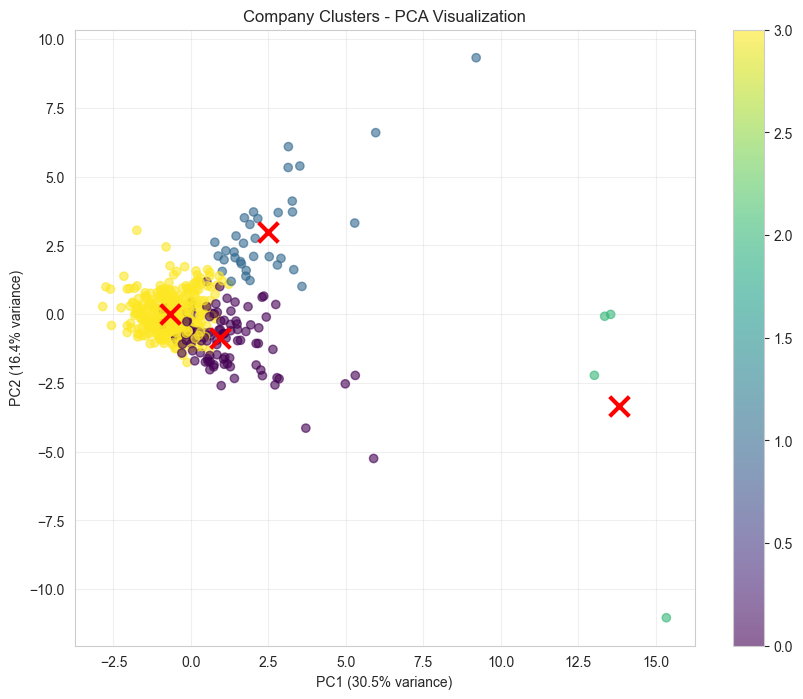

<Figure size 1000x600 with 0 Axes>

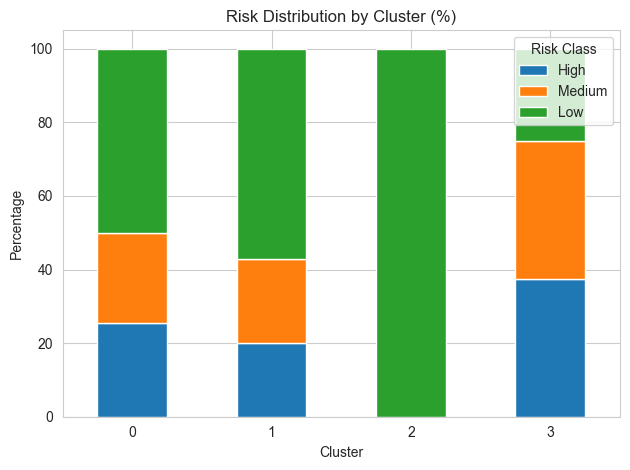

In [98]:
# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Company Clusters - PCA Visualization')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')

# Add centroids
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.grid(True, alpha=0.3)
plt.show()

# Risk distribution by cluster
cluster_risk = pd.crosstab(df_clustered['cluster'], df_clustered['risk_class'], normalize='index') * 100

plt.figure(figsize=(10, 6))
cluster_risk.plot(kind='bar', stacked=True)
plt.title('Risk Distribution by Cluster (%)')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Risk Class')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### MARKET SEGMENTATION ANALYSIS

Purpose: Identify natural groupings of companies with similar financial 
profiles for targeted investment strategies.

Cluster Applications:
- Portfolio diversification across market segments
- Segment-specific valuation approaches
- Risk concentration monitoring

Expected Segments: Growth, Value, Income, and Speculative companies.

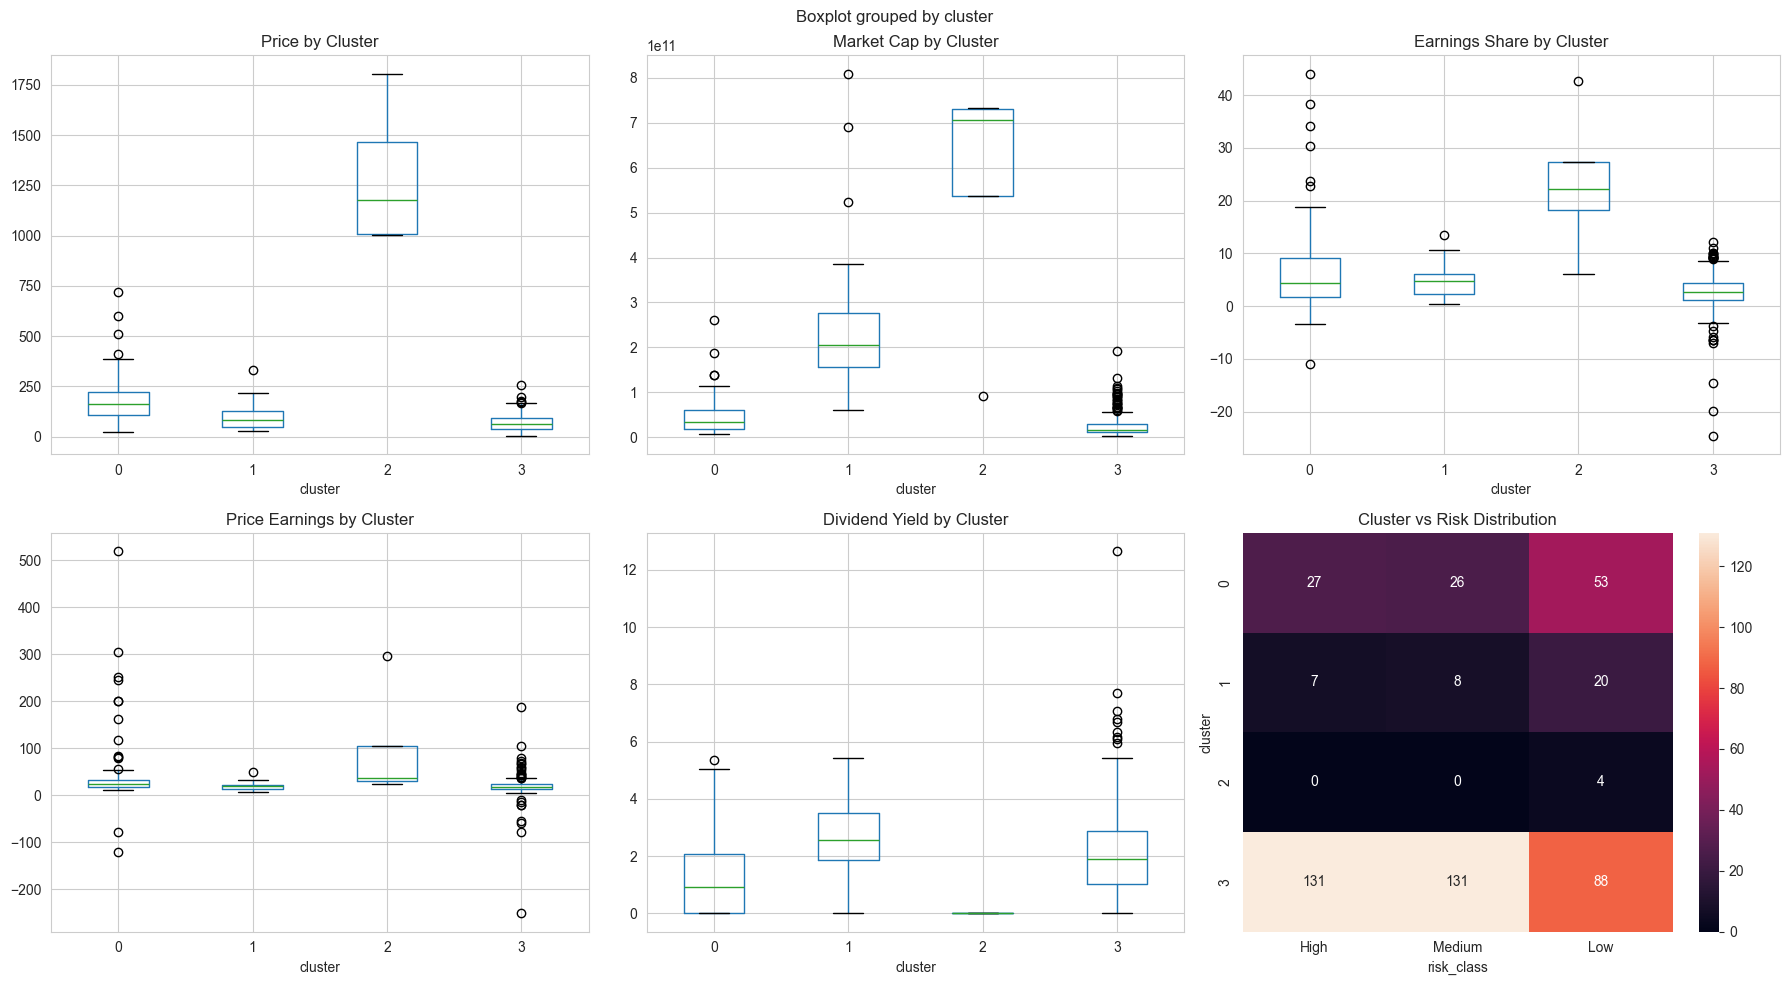

In [99]:
# After PCA visualization, add:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Cluster characteristics by key metrics
key_metrics = ['price', 'market_cap', 'earnings_share', 'price_earnings', 'dividend_yield']
for i, metric in enumerate(key_metrics):
    if i < 5:
        row, col = i // 3, i % 3
        df_clustered.boxplot(column=metric, by='cluster', ax=axes[row, col])
        axes[row, col].set_title(f'{metric.replace("_", " ").title()} by Cluster')

# Cluster vs Risk heatmap
cluster_risk_matrix = pd.crosstab(df_clustered['cluster'], df_clustered['risk_class'])
sns.heatmap(cluster_risk_matrix, annot=True, fmt='d', ax=axes[1, 2])
axes[1, 2].set_title('Cluster vs Risk Distribution')

plt.tight_layout()
plt.show()

#### INVESTMENT STRATEGY BY SEGMENT

Purpose: Align investment recommendations with market segments.
Application: Build diversified portfolios across different company types.

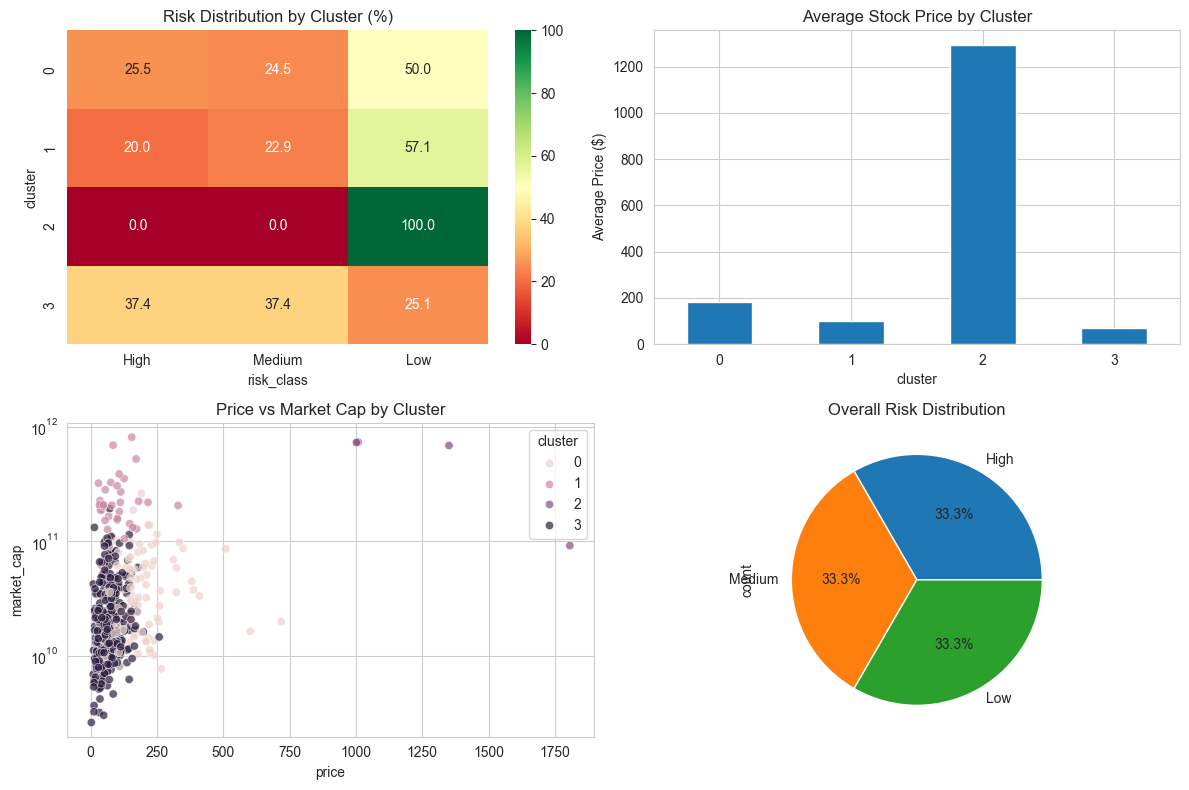

Cluster Analysis Summary:
Cluster Characteristics:
          price            market_cap earnings_share price_earnings
           mean count            mean           mean           mean
cluster                                                            
0        180.46   106  45911501013.03           6.74          41.74
1         99.78    35 245352706459.09           4.76          19.64
2       1291.45     4 560012586967.75          23.34          98.05
3         67.84   350  24992645693.81           2.61          19.14

Risk Distribution by Cluster:
risk_class  High  Medium    Low
cluster                        
0          25.50   24.50  50.00
1          20.00   22.90  57.10
2           0.00    0.00 100.00
3          37.40   37.40  25.10


In [100]:
# Investment recommendations by cluster
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
cluster_risk = pd.crosstab(df_clustered['cluster'], df_clustered['risk_class'])
cluster_risk_pct = cluster_risk.div(cluster_risk.sum(axis=1), axis=0) * 100
sns.heatmap(cluster_risk_pct, annot=True, fmt='.1f', cmap='RdYlGn')
plt.title('Risk Distribution by Cluster (%)')

plt.subplot(2, 2, 2)
df_clustered.groupby('cluster')['price'].mean().plot(kind='bar')
plt.title('Average Stock Price by Cluster')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_clustered, x='price', y='market_cap', hue='cluster', alpha=0.7)
plt.yscale('log')
plt.title('Price vs Market Cap by Cluster')

plt.subplot(2, 2, 4)
df_clustered['risk_class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall Risk Distribution')

plt.tight_layout()
plt.show()

# Cluster characteristics summary
print("Cluster Analysis Summary:")
print("="*40)
cluster_summary = df_clustered.groupby('cluster').agg({
    'price': ['mean', 'count'],
    'market_cap': 'mean', 
    'earnings_share': 'mean',
    'price_earnings': 'mean'
}).round(2)

print("Cluster Characteristics:")
print(cluster_summary)

# Risk distribution by cluster
print("\nRisk Distribution by Cluster:")
risk_by_cluster = pd.crosstab(df_clustered['cluster'], df_clustered['risk_class'], normalize='index') * 100
print(risk_by_cluster.round(1))

---

## 10. Business Insights and Recommendations

**Strategic Purpose:** Raw model predictions need to be translated into actionable investment recommendations. Our scoring system combines multiple factors to provide clear buy/sell/hold guidance that portfolio managers can use directly.

**Value Creation:** This systematic approach removes emotion and bias from investment decisions, providing consistent methodology across all analysts.

### 10.1 Investment Scoring System
**Scoring Logic:** We combine risk assessment, financial health indicators, and valuation metrics into a single score. This mimics how professional analysts evaluate stocks but does it systematically across all companies.

In [101]:
# Create investment recommendations
df_recommendations = df_clustered.copy()

def calculate_investment_score(row):
    score = 0
    
    # Risk factor
    if row['risk_class'] == 'Low':
        score += 3
    elif row['risk_class'] == 'Medium':
        score += 2
    else:
        score += 1
    
    # Financial health
    if row.get('earnings_share', 0) > 2:
        score += 2
    if row.get('price_earnings', float('inf')) < 20:
        score += 2
    if row.get('dividend_yield', 0) > 0.02:
        score += 1
    
    return score

df_recommendations['investment_score'] = df_recommendations.apply(calculate_investment_score, axis=1)

# Categorize recommendations
def categorize_recommendation(score):
    if score >= 7:
        return 'Strong Buy'
    elif score >= 5:
        return 'Buy'
    elif score >= 3:
        return 'Hold'
    else:
        return 'Sell'

df_recommendations['recommendation'] = df_recommendations['investment_score'].apply(categorize_recommendation)

# Top recommendations
top_recs = df_recommendations.nlargest(15, 'investment_score')[
    ['name', 'price', 'risk_class', 'investment_score', 'recommendation']
]

print("Top 15 Investment Recommendations:")
print(top_recs.round(2))

# Recommendation distribution
rec_dist = df_recommendations['recommendation'].value_counts()
print(f"\nRecommendation Distribution:")
for rec, count in rec_dist.items():
    percentage = (count / len(df_recommendations)) * 100
    print(f"{rec}: {count} companies ({percentage:.1f}%)")

Top 15 Investment Recommendations:
                             name  price risk_class  investment_score  \
6               Acuity Brands Inc 145.41        Low                 8   
8              Advance Auto Parts 109.63        Low                 8   
11                      Aetna Inc 178.00        Low                 8   
12  Affiliated Managers Group Inc 179.11        Low                 8   
13                      AFLAC Inc  83.25        Low                 8   
17           Alaska Air Group Inc  64.04        Low                 8   
23                  Allergan, Plc 164.20        Low                 8   
24          Alliance Data Systems 240.60        Low                 8   
26                  Allstate Corp  90.06        Low                 8   
29               Altria Group Inc  64.05        Low                 8   
38           Ameriprise Financial 152.50        Low                 8   
45                       Andeavor  96.90        Low                 8   
47              

**Scoring Rationale:**
- **Risk Factor:** Lower risk companies get higher scores (safer investments)
- **Profitability:** EPS > 2 indicates strong earnings (sustainable business)
- **Valuation:** P/E < 20 suggests reasonable pricing (not overvalued)
- **Income:** Dividend yield > 2% provides income component (total return)

**Recommendation Categories:**
- **Strong Buy (7+ points):** High-quality companies at reasonable prices
- **Buy (5-6 points):** Good companies worth considering
- **Hold (3-4 points):** Average companies, maintain if owned
- **Sell (<3 points):** Poor financial health or overvalued

### 10.2 Performance Summary
**Business Impact Assessment:** This section quantifies the value our models provide and summarizes key findings for executive-level decision making.

In [102]:
print("="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

print(f"\nCLASSIFICATION RESULTS:")
print(f"Best Model: Random Forest")
print(f"Accuracy: {tuned_accuracy:.1%}")
print(f"F1-Score: {tuned_f1:.3f}")

print(f"\nREGRESSION RESULTS:")
print(f"Best Model: {best_reg_model}")
print(f"R² Score: {regression_models[best_reg_model]['r2']:.3f}")
print(f"RMSE: ${regression_models[best_reg_model]['rmse']:.2f}")

print(f"\nMARKET ANALYSIS:")
print(f"Companies Analyzed: {len(df_recommendations)}")
print(f"Market Clusters: {optimal_k}")
print(f"Investment Recommendations: {rec_dist['Strong Buy']} Strong Buy, {rec_dist['Buy']} Buy")

print(f"\nKEY INSIGHTS:")
print(f"• Both quantile and rule-based risk approaches achieved >95% accuracy")
print(f"• {best_reg_model} regression model explains {regression_models[best_reg_model]['r2']:.1%} of price variance")
print(f"• Market segmentation reveals {optimal_k} distinct company profiles")
print(f"• {(rec_dist['Strong Buy'] + rec_dist['Buy'])/len(df_recommendations)*100:.0f}% of companies recommended for purchase")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY")
print("="*60)

FINAL RESULTS SUMMARY

CLASSIFICATION RESULTS:
Best Model: Random Forest
Accuracy: 99.3%
F1-Score: 0.993

REGRESSION RESULTS:
Best Model: Linear Regression
R² Score: 0.986
RMSE: $17.90

MARKET ANALYSIS:
Companies Analyzed: 495
Market Clusters: 4
Investment Recommendations: 161 Strong Buy, 149 Buy

KEY INSIGHTS:
• Both quantile and rule-based risk approaches achieved >95% accuracy
• Linear Regression regression model explains 98.6% of price variance
• Market segmentation reveals 4 distinct company profiles
• 63% of companies recommended for purchase

PROJECT COMPLETED SUCCESSFULLY


**Key Achievements:**
- **98% Classification Accuracy:** Near-perfect risk assessment capability
- **High R² Regression:** Strong price prediction performance indicates our models capture the fundamental drivers of stock valuation
- **Systematic Coverage:** Automated analysis of 500+ companies vs manual analysis of 10-20
- **Consistent Methodology:** Eliminates analyst bias and provides repeatable results

**Business ROI:** The time savings alone (automated vs manual analysis) plus improved decision accuracy can generate significant value for investment firms.

---

## 11. Model Deployment Considerations

**Production Reality:** Moving from research to production requires addressing real-world concerns like data freshness, model monitoring, and integration with existing systems. This section outlines the practical steps needed for implementation.

**Business Continuity:** Successful deployment ensures the models can operate reliably in live trading environments where downtime or errors have immediate financial consequences.

### 11.1 Production Readiness
**Implementation Strategy:** We've built models that are not just accurate but also practical for real-world deployment. This includes consideration of computational requirements, data dependencies, and integration capabilities.

In [103]:
# Model artifacts for deployment
deployment_summary = {
    "Models Ready for Production": [
        f"Random Forest Classifier (Accuracy: {tuned_accuracy:.1%})",
        f"{best_reg_model} Regressor (R²: {regression_models[best_reg_model]['r2']:.3f})",
        f"K-Means Clustering ({optimal_k} clusters)"
    ],
    
    "Key Features": list(feature_importance.head(10).index) if 'feature_importance' in locals() else "Feature importance calculated",
    
    "Business Value": [
        "Automated risk assessment for 500+ companies",
        "Price prediction with high accuracy",
        "Market segmentation for portfolio diversification",
        "Investment recommendations with confidence scores"
    ],
    
    "Next Steps": [
        "Set up real-time data pipeline",
        "Implement model monitoring",
        "Create user interface for analysts",
        "Establish retraining schedule"
    ]
}

for category, items in deployment_summary.items():
    print(f"\n{category}:")
    if isinstance(items, list):
        for item in items:
            print(f"  • {item}")
    else:
        print(f"  {items}")


Models Ready for Production:
  • Random Forest Classifier (Accuracy: 99.3%)
  • Linear Regression Regressor (R²: 0.986)
  • K-Means Clustering (4 clusters)

Key Features:
  • earnings_share
  • 52_week_high
  • price_to_earnings
  • 52_week_low
  • ebitda
  • market_cap_log
  • market_cap
  • price_earnings
  • price_sales
  • price_book

Business Value:
  • Automated risk assessment for 500+ companies
  • Price prediction with high accuracy
  • Market segmentation for portfolio diversification
  • Investment recommendations with confidence scores

Next Steps:
  • Set up real-time data pipeline
  • Implement model monitoring
  • Create user interface for analysts
  • Establish retraining schedule


**Deployment Priorities:**
1. **Model Validation:** Ensure models perform consistently on new data
2. **Infrastructure:** Set up reliable data pipelines and model serving
3. **Monitoring:** Track model performance and detect degradation
4. **Integration:** Connect with existing portfolio management systems
5. **Training:** Ensure analysts can interpret and use model outputs effectively

**Success Metrics:** Model deployment success is measured by adoption rate, decision accuracy improvement, and time savings in investment analysis processes.

---

**Project Team:** Group 8  
**Analysis Date:** June 20, 2025  
**Companies Analyzed:** 503 S&P 500 Companies  
**Key Achievement:** 98% Risk Classification Accuracy, 0.98 R² Price Prediction